Félicitations à tous les étudiants qui passent l'examen certifiant de Data Analyst avec la Wild Scode School !  
Vous avez parcouru un chemin remarquable dans votre apprentissage des compétences analytiques et votre maîtrise des techniques de traitement des données.  
Vous serez évalué sur des compétences à travers 4 cas pratiques correspondant au 4 blocs de la certification:
- Bloc 1 : SQL, RGPD, Web Scraping et API
- Bloc 2 : Pandas
- Bloc 3 : Machine Learning
- Bloc 4 : Business Case

Vous pouvez effectuer les cas pratiques dans l'ordre que vous souhaitez. Pour vous aider dans votre organisation de travail, vous trouverez une estimation du temps pour chaque partie.  
En ce qui concerne les réponses écrites, pensez à bien soigner les explications, comme si vous répondiez à un client.

**Votre google collab qui contient toutes vos réponses à l'examen devra être déposé au plus tard ______ dans le dossier drive individuel dont le lien vous a été communiqué par mail. Pensez bien à rendre accessible votre devoir en "Viewer".**   

---

**Pour le cas pratique "Business Case", votre présentation se décompose sur deux supports:**
- **Slides de présentations contenant l'introduction (Présentation du contexte et problématique) et la conclusion (recommandations pour le client)**
- **Dashboard que vous utiliserez pour présenter vos graphiques et tables**  
---

Veuillez mettre dans le dossier vos slides sous format .pdf, ainsi que des captures d'écrans de votre tableau de bord à l'intérieur de ce même .pdf. Il est indispensable que tous les éléments pour la présentation soient déposés dans ce dossier, dans le temps imparti.


De mercredi à vendredi, auront lieu les oraux pour chaque étudiant.
Chaque passage à l'oral se déroule de la façon suivante:

1. Questions du formateur à l'étudiant, à partir du google collab qui contient les réponses aux cas pratiques SQL, RGPD, Web Scraping & API, Pandas et Machine Learning. Vous devrez partager votre écran et permettre au formateur de vous poser des questions sur le travail fourni sur votre fichier google collab.
2. Présentation du cas pratique "Business Case", d'une durée de 7 minutes, suivi d'une série de questions posées par le formateur.


Vous terminerez avec la présentation du cas pratique "Business Case", en répondant au besoin du client comme indiqué dans la partie Cas Pratique.


 Bonne chance à tous ! 🎉📊

---

# SQL, RGPD, Web Scraping & API  _(2 heures)_

## SQL

Olist est une entreprise implanté et qui n'opère qu'au Brésil. C'est une entreprise 100% numérique(les opérations commerciales sont entièrement gérées en ligne). Olist est un service e-commerce pour les vendeurs, et intéresse surtout les "petits" commerces qui désirent avoir une bonne visibilité. En effet, Olist connecte  les (petits) commerçants aux places de marché les plus importantes du Brésil (Amazon, Bahia, Walmart, ...).

In [ ]:
import requests
import zipfile
import sqlite3
import pandas as pd

# Obtenez le lien du fichier ZIP brut depuis GitHub
r = requests.get('https://github.com/murpi/olist/blob/master/olist.sqlite.zip?raw=true')
open('olist.sqlite.zip', 'wb').write(r.content)

# Dezipper
with zipfile.ZipFile("olist.sqlite.zip","r") as zip_ref:
    zip_ref.extractall()

# Connection
conn = sqlite3.connect('olist.sqlite')


# Affichage des tables qui composent la base de données
cursor = conn.cursor()
schema = cursor.execute("SELECT * FROM sqlite_master where type='table'").fetchall()
pd.DataFrame(schema, columns = ["type", "name", "table_name", "rootpage", "SQL"])

type                               name  \
0  table                  customers_dataset   
1  table  product_category_name_translation   
2  table                    sellers_dataset   
3  table                   products_dataset   
4  table                     orders_dataset   
5  table              order_reviews_dataset   
6  table             order_payments_dataset   
7  table                order_items_dataset   
8  table                geolocation_dataset   

                          table_name  rootpage  \
0                  customers_dataset         2   
1  product_category_name_translation      2236   
2                    sellers_dataset      2237   
3                   products_dataset      2282   
4                     orders_dataset      2859   
5              order_reviews_dataset      7391   
6             order_payments_dataset     11053   
7                order_items_dataset     12645   
8                geolocation_dataset     16680   

                                                 SQL  
0  CREATE TABLE "customers_dataset" (\n\t"custome...  
1  CREATE TABLE "product_category_name_translatio...  
2  CREATE TABLE "sellers_dataset" (\n\t"seller_id...  
3  CREATE TABLE "products_dataset" (\n\t"product_...  
4  CREATE TABLE "orders_dataset" (\n\t"order_id"\...  
5  CREATE TABLE "order_reviews_dataset" (\n\t"rev...  
6  CREATE TABLE "order_payments_dataset" (\n\t"or...  
7  CREATE TABLE "order_items_dataset" (\n\t"order...  
8  CREATE TABLE "geolocation_dataset" (\n\t"geolo...

### Affichage des tables

In [ ]:
# Voici un exemple de requête sql. La requête SQL est entre guillemets pour le premier argument, puis la variable conn en second argument.
# Affichage de la table customers_dataset sur les infos clients :

pd.read_sql("""SELECT *
               FROM customers_dataset""", conn)

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [ ]:
# Affichage de la table product_category_name_translation sur la traduction des catégories de produits

pd.read_sql("""SELECT *
               FROM product_category_name_translation""", conn)

product_category_name product_category_name_english
0                    beleza_saude                 health_beauty
1          informatica_acessorios         computers_accessories
2                      automotivo                          auto
3                 cama_mesa_banho                bed_bath_table
4                moveis_decoracao               furniture_decor
..                            ...                           ...
66                         flores                       flowers
67             artes_e_artesanato         arts_and_craftmanship
68                fraldas_higiene           diapers_and_hygiene
69  fashion_roupa_infanto_juvenil     fashion_childrens_clothes
70             seguros_e_servicos         security_and_services

[71 rows x 2 columns]

In [ ]:
# Affichage de la table sellers_dataset sur les vendeurs

pd.read_sql("""SELECT *
               FROM sellers_dataset""", conn)

seller_id  seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15                   13023   
1     d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2     ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3     c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4     51a04a8a6bdcb23deccc82b0b80742cf                   12914   
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166                   87111   
3091  f8201cab383e484733266d1906e2fdfa                   88137   
3092  74871d19219c7d518d0090283e03c137                    4650   
3093  e603cf3fec55f8697c9059638d6c8eb5                   96080   
3094  9e25199f6ef7e7c347120ff175652c3b                   12051   

            seller_city seller_state  
0              campinas           SP  
1            mogi guacu           SP  
2        rio de janeiro           RJ  
3             sao paulo           SP  
4     braganca paulista           SP  
...                 ...          ...  
3090            sarandi           PR  
3091            palhoca           SC  
3092          sao paulo           SP  
3093            pelotas           RS  
3094            taubate           SP  

[3095 rows x 4 columns]

In [ ]:
# Affichage de la table products_dataset sur les produits

pd.read_sql("""SELECT *
               FROM products_dataset""", conn)

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [ ]:
# Affichage de la table orders_dataset sur les commandes

pd.read_sql("""SELECT *
               FROM orders_dataset""", conn)

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [ ]:
# Affichage de la table order_reviews_dataset sur les notes

pd.read_sql("""SELECT *
               FROM order_reviews_dataset""", conn)

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                 None   
1                 5                 None   
2                 5                 None   
3                 5                 None   
4                 5                 None   
...             ...                  ...   
99219             5                 None   
99220             5                 None   
99221             5                 None   
99222             4                 None   
99223             1                 None   

                                  review_comment_message review_creation_date  \
0                                                   None  2018-01-18 00:00:00   
1                                                   None  2018-03-10 00:00:00   
2                                                   None  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                               None  2018-07-07 00:00:00   
99220                                               None  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                               None  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [ ]:
# Affichage de la table order_payments_dataset sur les paiements

pd.read_sql("""SELECT *
               FROM order_payments_dataset""", conn)

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [ ]:
# Affichage de la table order_items_dataset. A première vue, il s'agit d'une table intermédiaire.


pd.read_sql("""SELECT *
               FROM order_items_dataset""", conn)

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [ ]:
# Affichage de la table geolocation_dataset sur la géolocalisation (latitude, longitude)

pd.read_sql("""SELECT *
               FROM geolocation_dataset""", conn)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

### Questions

> 1. Le schéma de la base de données ci-dessous représente plusieurs tables.
Il existe des relations entre ces tables.  

Quelle requête permettra d'afficher le nombre total de produits par commande, dans l'ordre croissant en fonction du nombre total de produits par commande.



---

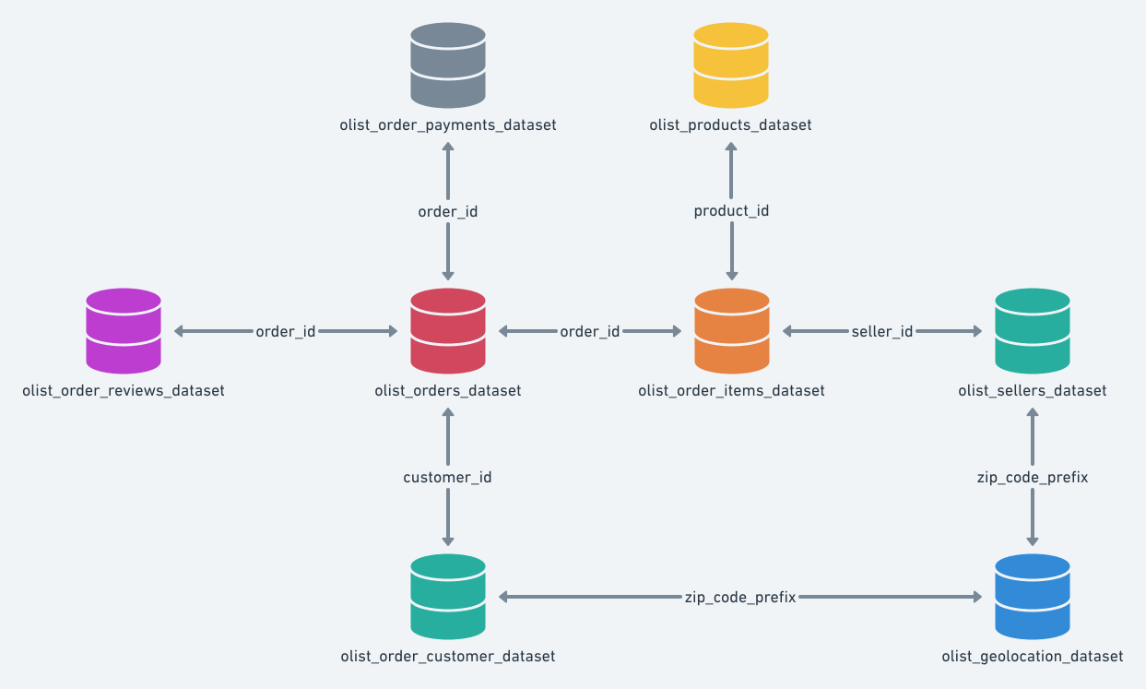

Résultat attendu:

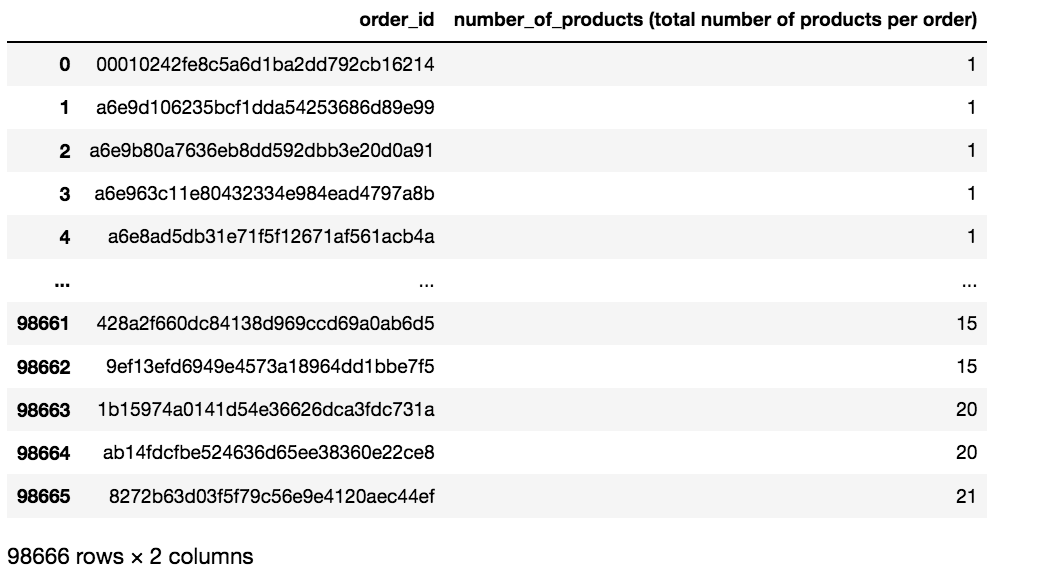

In [ ]:
# Requête

pd.read_sql("""SELECT order_id,
COUNT(product_id) AS number_of_products
FROM order_items_dataset
GROUP BY order_id
ORDER BY number_of_products""", conn)

order_id  number_of_products
0      00010242fe8c5a6d1ba2dd792cb16214                   1
1      00018f77f2f0320c557190d7a144bdd3                   1
2      000229ec398224ef6ca0657da4fc703e                   1
3      00024acbcdf0a6daa1e931b038114c75                   1
4      00042b26cf59d7ce69dfabb4e55b4fd9                   1
...                                 ...                 ...
98661  428a2f660dc84138d969ccd69a0ab6d5                  15
98662  9ef13efd6949e4573a18964dd1bbe7f5                  15
98663  1b15974a0141d54e36626dca3fdc731a                  20
98664  ab14fdcfbe524636d65ee38360e22ce8                  20
98665  8272b63d03f5f79c56e9e4120aec44ef                  21

[98666 rows x 2 columns]

- Sélection de la colonne order_id,
- Utilisation de COUNT pour compter le nombre de produits pour chaque commande (colonne product_id), colonne nommée number_of_products dans le résultat
- à partir de la table order_items_dataset
- regroupement des résultats en fonction de la colonne order_id
- ordonné par la colonne number_of_products dans l'ordre croissant (ASC par défaut).

> 2. Toujours en se basant sur le schéma de la base de données, existe-t-il une table intermédiaire ? Si oui, quel est le nom de cette table ? Dans quelle situation est-il recommandé de créer une table intermédiaire pour connecter deux tables ?



_Réponse_:

- Oui, il existe une table intermédiaire.
- Il s'agit de la table order_items_dataset. Elle connecte les tables orders_dataset (order_id), products_dataset (product_id) et sellers_dataset (seller_id).
- Il est conseillé de créer une table intermédiaire pour gérer deux tables qui possèdent une relation plusieurs à plusieurs (many to many). En effet, dans notre cas, il est possible qu'une commande (order) contienne plusieurs produits (products) et qu'un même produit puisse apparaître dans plusieurs commandes ou qu'un vendeur puisse proposer plusieurs produits et qu'un même produit soit proposé par plusieurs vendeurs.


Effectuer des requêtes, pour répondre aux questions suivantes.

> 3.1 Renvoyer la note moyenne par vendeur

Résultat attendu:



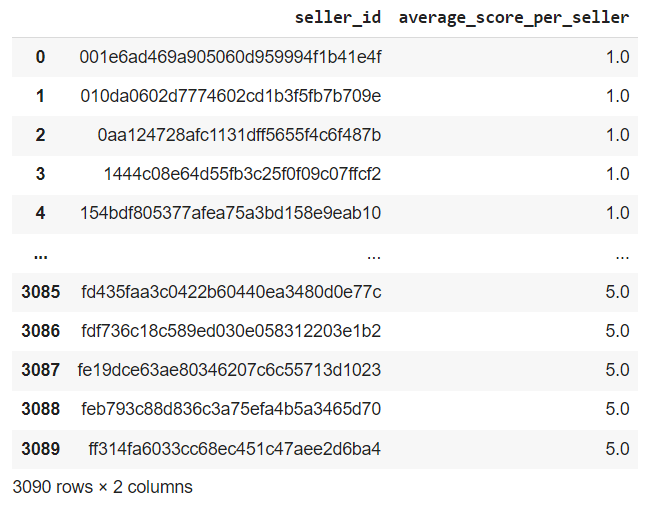

In [ ]:
# Requête

pd.read_sql("""SELECT s.seller_id, AVG(r.review_score) AS average_score_per_seller
FROM order_items_dataset AS i
JOIN sellers_dataset AS s
ON i.seller_id = s.seller_id
JOIN order_reviews_dataset AS r
ON i.order_id = r.order_id
GROUP BY s.seller_id
ORDER BY average_score_per_seller""", conn)

seller_id  average_score_per_seller
0     001e6ad469a905060d959994f1b41e4f                       1.0
1     010da0602d7774602cd1b3f5fb7b709e                       1.0
2     0aa124728afc1131dff5655f4c6f487b                       1.0
3     1444c08e64d55fb3c25f0f09c07ffcf2                       1.0
4     154bdf805377afea75a3bd158e9eab10                       1.0
...                                ...                       ...
3085  fd435faa3c0422b60440ea3480d0e77c                       5.0
3086  fdf736c18c589ed030e058312203e1b2                       5.0
3087  fe19dce63ae80346207c6c55713d1023                       5.0
3088  feb793c88d836c3a75efa4b5a3465d70                       5.0
3089  ff314fa6033cc68ec451c47aee2d6ba4                       5.0

[3090 rows x 2 columns]

Comme nous travaillerons sur plusieurs tables, il faudra effectuer des jointures pour obtenir le résultat de cette requête.

- Sélectionner les colonnes seller_id et la moyenne des notes (review_score), colonne renommée en average_score_per_seller dans le résultat
- de la table intermédiaire order_items_dataset renommée i pour simplifier l'écriture de la requête
- on y joint la table des vendeurs (seller_dataset) renommée s
- grâce à la colonne seller_id pour joindre les commandes et vendeurs
- on y joint la table des notes (order_reviews_dataset) renommée r
- grâce à la colonne order_id pour joindre les commandes et les notes
- on regroupe par identifiant de vendeur (seller_id)
- et on trie les résultats par note moyenne par vendeur, en ordre croissant.

> 3.2 Renvoyer le nombre de commandes par vendeur, lorsque le nombre de commandes est supérieur à 1000 pour un vendeur, dans l'ordre décroissant en fonction de la note moyenne par vendeur.

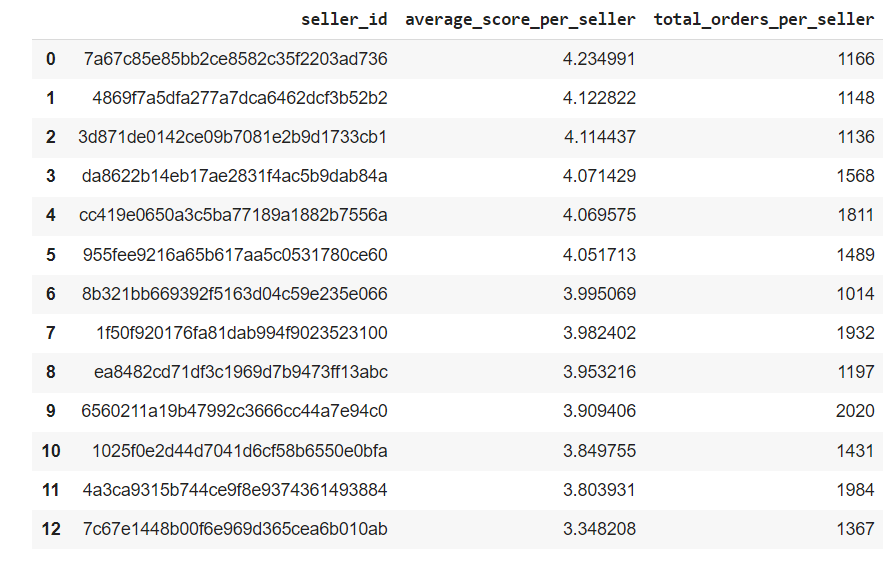

Résultat attendu:



In [ ]:
# Requête

pd.read_sql("""SELECT s.seller_id, AVG(r.review_score) AS average_score_per_seller, COUNT(i.order_id) AS total_orders_per_seller
FROM order_items_dataset AS i
JOIN sellers_dataset AS s
ON i.seller_id = s.seller_id
JOIN order_reviews_dataset AS r
ON i.order_id = r.order_id
GROUP BY s.seller_id
HAVING total_orders_per_seller > 1000
ORDER BY average_score_per_seller DESC""", conn)

seller_id  average_score_per_seller  \
0   7a67c85e85bb2ce8582c35f2203ad736                  4.234991   
1   4869f7a5dfa277a7dca6462dcf3b52b2                  4.122822   
2   3d871de0142ce09b7081e2b9d1733cb1                  4.114437   
3   da8622b14eb17ae2831f4ac5b9dab84a                  4.071429   
4   cc419e0650a3c5ba77189a1882b7556a                  4.069575   
5   955fee9216a65b617aa5c0531780ce60                  4.051713   
6   8b321bb669392f5163d04c59e235e066                  3.995069   
7   1f50f920176fa81dab994f9023523100                  3.982402   
8   ea8482cd71df3c1969d7b9473ff13abc                  3.953216   
9   6560211a19b47992c3666cc44a7e94c0                  3.909406   
10  1025f0e2d44d7041d6cf58b6550e0bfa                  3.849755   
11  4a3ca9315b744ce9f8e9374361493884                  3.803931   
12  7c67e1448b00f6e969d365cea6b010ab                  3.348208   

    total_orders_per_seller  
0                      1166  
1                      1148  
2                      1136  
3                      1568  
4                      1811  
5                      1489  
6                      1014  
7                      1932  
8                      1197  
9                      2020  
10                     1431  
11                     1984  
12                     1367

- On aura des jointures également.

- Sélection des colonnes seller_id, la moyenne des notes pour chaque vendeur (review_score) nommée average_score_per_seller et le comptage du nbre de commandes par vendeur (order_id)
- à partir de la table order_items_dataset renommée i
- on y joint la table des vendeurs (sellers_dataset) renommée s
- grâce à seller_id pour joindre les commandes et vendeurs
- on y joint ensuite la table des notes (order_review_dataset) renommée r
- grâce à order_id pour joindre les commandes et les notes
- on regroupe par identifiant de vendeur
- on filtre pour ne garder dans les résultats que les vendeurs ayant plus de 1000 commandes
- on trie ces résultats par note moyenne dans l'ordre décroissant.


> 3.3. Quel produit figure dans le plus grand nombre de commandes différentes ?

Résultat attendu:

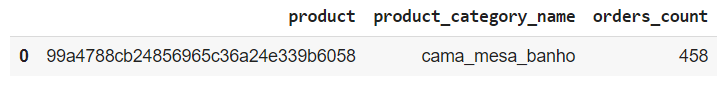

In [ ]:
# Requête

pd.read_sql("""SELECT i.product_id AS product, p.product_category_name, COUNT(DISTINCT i.order_id) AS orders_count
FROM order_items_dataset AS i
JOIN products_dataset AS p
ON i.product_id = p.product_id
GROUP BY i.product_id
ORDER BY orders_count DESC
LIMIT 1""", conn)

product product_category_name  orders_count
0  99a4788cb24856965c36a24e339b6058       cama_mesa_banho           467

*Note : le nombre de commandes trouvé en résultat est ici légèrement supérieur à ce qui est affiché dans la capture d'écran ci-dessus mais il s'agit bien du même produit. J'imagine que la base de données a été actualisée entre temps...*

On compte ici le nombre de commandes pour chaque produit.

- On sélectionne les colonnes product_id, product_category_name et le comptage distinct de chaque produit grâce à son identifiant
- à partir de la table order_items_dataset renommée i pour des raisons de simplicité
- on y joint la table des produits (products_dataset) renommée p
- grâce à product_id présente dans les deux tables pour joindr eles commandes et produits
- on regroupe les résultats par identifiant de produit
- on trie par le nombre de commandes en ordre décroissant
- on n'affiche qu'un seul résultat, car nous ne voulons que le produit ayant eu le plus grand nombre de commandes.



---

## RGPD

4. Dans le cadre du RGPD, est-ce que la base de données Olist utilisé pour les requêtes SQL contient des données sensibles ? Que ce soit le cas ou non, donner un exemple de données sensibles ?

_Réponse_:  


D'après la CNIL (Commission Nationale de l'Informatique et des Libertés, qui est le régulateur des données personnelles et qui aide à la conformité au RGPD pour les patriculiers et professionnels en France), les données sensibles forment une catégorie particulière des données personnelles.

https://www.cnil.fr/fr/definition/donnee-sensible

*Ce sont des informations qui révèlent la prétendue origine raciale ou ethnique, les opinions politiques, les convictions religieuses ou philosophiques ou l'appartenance syndicale, ainsi que le traitement des données génétiques, des données biométriques aux fins d'identifier une personne physique de manière unique, des données concernant la santé ou des données concernant la vie sexuelle ou l'orientation sexuelle d'une personne physique.*

Certes, dans la base de données Olist, il n'y a pas de nom, de prénom, date de naissance, téléphone, adresse e-mail, permettant d'identifier chaque client précisément. On a ici des identifiants, qui sont tout de même des données sensibles.

Il existe d'autres données sensibles liées notamment au type de paiement par exemple utilisé par le client (credit card) ou encore à la géolocalisation (latitude, longitude, ville, Etat, etc.), qui permettent, grâce à des jointures comme nous l'avons fait précédemment, d'avoir de plus en plus d'informations sur les clients et vendeurs et ce qu'ils ont commandé ou vendu, pour par exemple, faire des publicités ciblées...

---

## Web Scraping

5. Vous êtes chargé de collecter des données à partir d'un site web pour une analyse ultérieure. Décrivez les étapes que vous suivriez pour effectuer du web scraping de manière éthique et efficace.

_Réponse_:  


Le web scraping consiste à récupérer des données à partir d'un site web de façon automatisée. Il est souvent utilisé dans l'analyse de données.

*Note : Pour ma part, j'utilise Python et la bibliothèque requests pour effectuer du Web Scraping (Beautiful Soup).*

Identifier les pages ou se trouvent les données à collecter. En effet, il convient de minimiser le nombre de requêtes envoyées sur le serveur du site web, afin de ne pas surcharger ses ressources.

Mais attention, avant tout, il convient de vérifier si le site sur lequel on souhaite collecter des données l'autorise, car la protection des données prévaut sur tout le reste. Certains sites possèdent des protections.
Il faut savoir que la légalité de cette pratique reste encore floue.

https://www.blogdumoderateur.com/web-scraping-rpgd-regles-respecter/

Il faut, entre autres, lire les conditions d'utilisation du site et demander le consentement des personnes.

Privilégier des sites comme Wikipédia pour le Web Scraping, mais attention à cette fois-ci à la fiabilité des données de certaines pages !

Il est aussi conseillé de connaître quelques bases en HTML et CSS.










- Importer les bibliothèques
- Utiliser la bibliothèque requests qui permet d'utiliser le protocole HTTP pour récupérer le contenu de la page HTML. Si <Response [200]>, cest ok si le nombre commence par 4, c'est souvent une erreur.
- Utiliser l'attribut html.text pour afficher le code HTML.

In [ ]:
import requests
from bs4 import BeautifulSoup
import re

In [ ]:
# URL de la page Wikipedia Miss France
miss = "https://fr.wikipedia.org/wiki/Miss_France"
miss

'https://fr.wikipedia.org/wiki/Miss_France'

In [ ]:
# Identification comme navigateur
# navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
# html = requests.get(miss, headers={'User-Agent': navigator})

In [ ]:
# Requete URL initiale
wiki_miss_fr = requests.get(miss)
wiki_miss_fr

<Response [200]>

In [ ]:
wiki_miss_fr.text

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>Miss France — Wikipédia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-featur

- Faire une soup - Parsing

In [ ]:
soup = BeautifulSoup(wiki_miss_fr.text, "html.parser")
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-enabled vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="fr">
<head>
<meta charset="utf-8"/>
<title>Miss France — Wikipédia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-li

- On entre un peu plus dans le détail : on récupère les URLs les miss de chaque année

In [ ]:
 # Récupération des URLs

 soup.find_all("a")

[<a class="mw-jump-link" href="#bodyContent">Aller au contenu</a>,
 <a accesskey="z" href="/wiki/Wikip%C3%A9dia:Accueil_principal" title="Accueil général [z]"><span>Accueil</span></a>,
 <a href="/wiki/Portail:Accueil"><span>Portails thématiques</span></a>,
 <a accesskey="x" href="/wiki/Sp%C3%A9cial:Page_au_hasard" title="Affiche un article au hasard [x]"><span>Article au hasard</span></a>,
 <a href="/wiki/Wikip%C3%A9dia:Contact"><span>Contact</span></a>,
 <a href="/wiki/Aide:D%C3%A9buter"><span>Débuter sur Wikipédia</span></a>,
 <a href="/wiki/Aide:Accueil" title="Accès à l’aide"><span>Aide</span></a>,
 <a href="/wiki/Wikip%C3%A9dia:Accueil_de_la_communaut%C3%A9" title="À propos du projet, ce que vous pouvez faire, où trouver les informations"><span>Communauté</span></a>,
 <a accesskey="r" href="/wiki/Sp%C3%A9cial:Modifications_r%C3%A9centes" title="Liste des modifications récentes sur le wiki [r]"><span>Modifications récentes</span></a>,
 <a href="//donate.wikimedia.org/wiki/Special:F

In [ ]:
URLs_pages = soup.find_all("a", href=True, title=True)
print(len(URLs_pages))
URLs_pages[210:220]

2369


[<a class="mw-redirect" href="/wiki/La_Ferme_C%C3%A9l%C3%A9brit%C3%A9s_en_Afrique" title="La Ferme Célébrités en Afrique">La Ferme Célébrités en Afrique</a>,
 <a class="mw-redirect" href="/wiki/Miss_Nationale" title="Miss Nationale">Miss Nationale</a>,
 <a href="/wiki/Sylvie_Tellier" title="Sylvie Tellier">Sylvie Tellier</a>,
 <a href="/wiki/Miss_France_2011" title="Miss France 2011">Miss France 2011</a>,
 <a href="/wiki/Miss_Midi-Pyr%C3%A9n%C3%A9es" title="Miss Midi-Pyrénées">Miss Midi-Pyrénées</a>,
 <a href="/wiki/Miss_Nord-Pas-de-Calais" title="Miss Nord-Pas-de-Calais">Miss Nord-Pas-de-Calais</a>,
 <a class="mw-redirect" href="/wiki/Miss_Centre" title="Miss Centre">Miss Centre</a>,
 <a class="mw-redirect" href="/wiki/Tribunal_arbitral" title="Tribunal arbitral">tribunal arbitral</a>,
 <a href="/wiki/Miss_Prestige_National" title="Miss Prestige National">Miss Prestige National</a>,
 <a href="/wiki/Miss_France_1968" title="Miss France 1968">Miss France 1968</a>]

In [ ]:
URLs_pages[0]

<a accesskey="z" href="/wiki/Wikip%C3%A9dia:Accueil_principal" title="Accueil général [z]"><span>Accueil</span></a>

In [ ]:
URLs_pages[0].find("href")

In [ ]:
type(URLs_pages[0])

bs4.element.Tag

In [ ]:
URLs_pages[0].find_all()

[<span>Accueil</span>]

In [ ]:
# créer un dataframe
url_balise = []
titre_balise = []

for balise_a in URLs_pages:

    url = balise_a.get("href")
    url_balise.append(url)

    title = balise_a.get("title")
    titre_balise.append(title)

url_balise

['/wiki/Wikip%C3%A9dia:Accueil_principal',
 '/wiki/Sp%C3%A9cial:Page_au_hasard',
 '/wiki/Aide:Accueil',
 '/wiki/Wikip%C3%A9dia:Accueil_de_la_communaut%C3%A9',
 '/wiki/Sp%C3%A9cial:Modifications_r%C3%A9centes',
 '//donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&utm_medium=sidebar&utm_campaign=C13_fr.wikipedia.org&uselang=fr',
 '/wiki/Sp%C3%A9cial:Recherche',
 '/w/index.php?title=Sp%C3%A9cial:Cr%C3%A9er_un_compte&returnto=Miss+France',
 '/w/index.php?title=Sp%C3%A9cial:Connexion&returnto=Miss+France',
 '/w/index.php?title=Sp%C3%A9cial:Cr%C3%A9er_un_compte&returnto=Miss+France',
 '/w/index.php?title=Sp%C3%A9cial:Connexion&returnto=Miss+France',
 '/wiki/Sp%C3%A9cial:Mes_contributions',
 '/wiki/Sp%C3%A9cial:Mes_discussions',
 'https://ar.wikipedia.org/wiki/%D9%85%D9%84%D9%83%D8%A9_%D8%AC%D9%85%D8%A7%D9%84_%D9%81%D8%B1%D9%86%D8%B3%D8%A7',
 'https://br.wikipedia.org/wiki/Miss_France',
 'https://de.wikipedia.org/wiki/Miss_France',
 'https://en.wikipedia.org/wiki/Miss_

In [ ]:
titre_balise

['Accueil général [z]',
 'Affiche un article au hasard [x]',
 'Accès à l’aide',
 'À propos du projet, ce que vous pouvez faire, où trouver les informations',
 'Liste des modifications récentes sur le wiki [r]',
 'Soutenez-nous',
 'Rechercher sur Wikipédia [f]',
 'Nous vous encourageons à créer un compte utilisateur et vous connecter\u202f; ce n’est cependant pas obligatoire.',
 'Nous vous encourageons à vous connecter\u202f; ce n’est cependant pas obligatoire. [o]',
 'Nous vous encourageons à créer un compte utilisateur et vous connecter\u202f; ce n’est cependant pas obligatoire.',
 'Nous vous encourageons à vous connecter\u202f; ce n’est cependant pas obligatoire. [o]',
 'Une liste des modifications effectuées depuis cette adresse IP [y]',
 'La page de discussion pour les contributions depuis cette adresse IP [n]',
 'ملكة جمال فرنسا\xa0–\xa0arabe',
 'Miss France\xa0–\xa0breton',
 'Miss France\xa0–\xa0allemand',
 'Miss France\xa0–\xa0anglais',
 'Miss Francia\xa0–\xa0espagnol',
 'Miss F

In [ ]:
# Inclure url_balise et titre_balise dans un DataFrame
DF_liens = pd.DataFrame(zip(url_balise, titre_balise), columns=["url", "titre"])
DF_liens

url  \
0                /wiki/Wikip%C3%A9dia:Accueil_principal   
1                     /wiki/Sp%C3%A9cial:Page_au_hasard   
2                                    /wiki/Aide:Accueil   
3     /wiki/Wikip%C3%A9dia:Accueil_de_la_communaut%C...   
4        /wiki/Sp%C3%A9cial:Modifications_r%C3%A9centes   
...                                                 ...   
2364  https://foundation.wikimedia.org/wiki/Policy:T...   
2365       /wiki/Wikip%C3%A9dia:Cr%C3%A9dits_graphiques   
2366               /wiki/Sp%C3%A9cial:Citer/Miss_France   
2367                   https://wikimediafoundation.org/   
2368                                         /wiki/501c   

                                                  titre  
0                                   Accueil général [z]  
1                      Affiche un article au hasard [x]  
2                                        Accès à l’aide  
3     À propos du projet, ce que vous pouvez faire, ...  
4      Liste des modifications récentes sur le wiki [r]  
...                                                 ...  
2364  Conditions d’utilisation de la Wikimedia Found...  
2365                 Droit d'auteur de certaines icônes  
2366                     Citer ou réutiliser cette page  
2367                               Wikimedia Foundation  
2368                                               501c  

[2369 rows x 2 columns]

In [ ]:
# Vérification : y'a-t-il des valeurs manquantes ?
DF_liens.isna().sum()

# Non !

url      0
titre    0
dtype: int64

In [ ]:
# Récupération des Miss France

DF_liens[DF_liens["url"].str.contains("Miss")]
DF_liens

url  \
0                /wiki/Wikip%C3%A9dia:Accueil_principal   
1                     /wiki/Sp%C3%A9cial:Page_au_hasard   
2                                    /wiki/Aide:Accueil   
3     /wiki/Wikip%C3%A9dia:Accueil_de_la_communaut%C...   
4        /wiki/Sp%C3%A9cial:Modifications_r%C3%A9centes   
...                                                 ...   
2364  https://foundation.wikimedia.org/wiki/Policy:T...   
2365       /wiki/Wikip%C3%A9dia:Cr%C3%A9dits_graphiques   
2366               /wiki/Sp%C3%A9cial:Citer/Miss_France   
2367                   https://wikimediafoundation.org/   
2368                                         /wiki/501c   

                                                  titre  
0                                   Accueil général [z]  
1                      Affiche un article au hasard [x]  
2                                        Accès à l’aide  
3     À propos du projet, ce que vous pouvez faire, ...  
4      Liste des modifications récentes sur le wiki [r]  
...                                                 ...  
2364  Conditions d’utilisation de la Wikimedia Found...  
2365                 Droit d'auteur de certaines icônes  
2366                     Citer ou réutiliser cette page  
2367                               Wikimedia Foundation  
2368                                               501c  

[2369 rows x 2 columns]

Nettoyage

In [ ]:
# Utilisation d'un motif = r"wiki/miss quelquechose France quelquechose 4 chiffres"
motif = r"wiki/miss.*france.*\d{4}"
motif

'wiki/miss.*france.*\\d{4}'

In [ ]:
url_test = "/wiki/Miss_France_2024"
url_test

'/wiki/Miss_France_2024'

In [ ]:
re.search(motif, url_test.lower()) #ne pas oublier de passer en minuscules

<re.Match object; span=(1, 22), match='wiki/miss_france_2024'>

In [ ]:
page_missfr = lambda url_duDF: re.search(motif, url_duDF.lower())
res_recherche_motif = DF_liens["url"].apply(page_missfr)
res_recherche_motif

0       None
1       None
2       None
3       None
4       None
        ... 
2364    None
2365    None
2366    None
2367    None
2368    None
Name: url, Length: 2369, dtype: object

In [ ]:
# Ne récuperer que les lignes qui correspondent au motif
DF_miss = DF_liens[res_recherche_motif.notna()]
DF_miss

url             titre
57    /wiki/Miss_France_1920  Miss France 1920
84    /wiki/Miss_France_2020  Miss France 2020
89    /wiki/Miss_France_1987  Miss France 1987
94    /wiki/Miss_France_1987  Miss France 1987
97    /wiki/Miss_France_1988  Miss France 1988
...                      ...               ...
1888  /wiki/Miss_France_2020  Miss France 2020
1890  /wiki/Miss_France_2021  Miss France 2021
1892  /wiki/Miss_France_2022  Miss France 2022
1894  /wiki/Miss_France_2023  Miss France 2023
1896  /wiki/Miss_France_2024  Miss France 2024

[258 rows x 2 columns]

In [ ]:
# Supprimer les URLs en doublons s'il y en a
DF_miss.drop_duplicates(inplace=True)
DF_miss

<ipython-input-37-b12311c4ae84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_miss.drop_duplicates(inplace=True)


url             titre
57    /wiki/Miss_France_1920  Miss France 1920
84    /wiki/Miss_France_2020  Miss France 2020
89    /wiki/Miss_France_1987  Miss France 1987
97    /wiki/Miss_France_1988  Miss France 1988
98    /wiki/Miss_France_1989  Miss France 1989
...                      ...               ...
977   /wiki/Miss_France_2022  Miss France 2022
989   /wiki/Miss_France_2024  Miss France 2024
1711  /wiki/Miss_France_1930  Miss France 1930
1716  /wiki/Miss_France_1932  Miss France 1932
1768  /wiki/Miss_France_1963  Miss France 1963

[80 rows x 2 columns]

In [ ]:
# Regex pour identifier les années
motif_annee = r"\d{4}$"
motif_annee

'\\d{4}$'

In [ ]:
miss_france_test = "Miss France 2000"
miss_france_test

'Miss France 2000'

In [ ]:
re.search(motif_annee, miss_france_test)

<re.Match object; span=(12, 16), match='2000'>

In [ ]:
chiffresalafin = lambda titre_duDF: re.search(motif_annee, titre_duDF).group()
res_recherche_motif_annee = DF_miss["titre"].apply(chiffresalafin)
res_recherche_motif_annee

57      1920
84      2020
89      1987
97      1988
98      1989
        ... 
977     2022
989     2024
1711    1930
1716    1932
1768    1963
Name: titre, Length: 80, dtype: object

In [ ]:
DF_miss["annee"] = res_recherche_motif_annee
DF_miss

<ipython-input-42-6aa8cd8e7b99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_miss["annee"] = res_recherche_motif_annee


url             titre annee
57    /wiki/Miss_France_1920  Miss France 1920  1920
84    /wiki/Miss_France_2020  Miss France 2020  2020
89    /wiki/Miss_France_1987  Miss France 1987  1987
97    /wiki/Miss_France_1988  Miss France 1988  1988
98    /wiki/Miss_France_1989  Miss France 1989  1989
...                      ...               ...   ...
977   /wiki/Miss_France_2022  Miss France 2022  2022
989   /wiki/Miss_France_2024  Miss France 2024  2024
1711  /wiki/Miss_France_1930  Miss France 1930  1930
1716  /wiki/Miss_France_1932  Miss France 1932  1932
1768  /wiki/Miss_France_1963  Miss France 1963  1963

[80 rows x 3 columns]

In [ ]:
# Vérifier le type
DF_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 57 to 1768
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     80 non-null     object
 1   titre   80 non-null     object
 2   annee   80 non-null     object
dtypes: object(3)
memory usage: 4.6+ KB


In [ ]:
DF_miss["annee"] = DF_miss["annee"].astype(int)
DF_miss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 57 to 1768
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     80 non-null     object
 1   titre   80 non-null     object
 2   annee   80 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 4.6+ KB


<ipython-input-44-20c9f62641f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_miss["annee"] = DF_miss["annee"].astype(int)


In [ ]:
# Ne garder que les 20 miss les plus récentes
DF_miss = DF_miss[DF_miss["annee"] >= 2005]
DF_miss

url             titre  annee
84   /wiki/Miss_France_2020  Miss France 2020   2020
111  /wiki/Miss_France_2010  Miss France 2010   2010
115  /wiki/Miss_France_2009  Miss France 2009   2009
116  /wiki/Miss_France_2023  Miss France 2023   2023
153  /wiki/Miss_France_2012  Miss France 2012   2012
213  /wiki/Miss_France_2011  Miss France 2011   2011
243  /wiki/Miss_France_2006  Miss France 2006   2006
819  /wiki/Miss_France_2005  Miss France 2005   2005
837  /wiki/Miss_France_2007  Miss France 2007   2007
846  /wiki/Miss_France_2008  Miss France 2008   2008
891  /wiki/Miss_France_2013  Miss France 2013   2013
899  /wiki/Miss_France_2014  Miss France 2014   2014
913  /wiki/Miss_France_2015  Miss France 2015   2015
920  /wiki/Miss_France_2016  Miss France 2016   2016
929  /wiki/Miss_France_2017  Miss France 2017   2017
936  /wiki/Miss_France_2018  Miss France 2018   2018
945  /wiki/Miss_France_2019  Miss France 2019   2019
969  /wiki/Miss_France_2021  Miss France 2021   2021
977  /wiki/Miss_France_2022  Miss France 2022   2022
989  /wiki/Miss_France_2024  Miss France 2024   2024

In [ ]:
# Ordonner par année
DF_miss.sort_values("annee", inplace=True)
DF_miss

<ipython-input-46-5b5be938f756>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_miss.sort_values("annee", inplace=True)


url             titre  annee
819  /wiki/Miss_France_2005  Miss France 2005   2005
243  /wiki/Miss_France_2006  Miss France 2006   2006
837  /wiki/Miss_France_2007  Miss France 2007   2007
846  /wiki/Miss_France_2008  Miss France 2008   2008
115  /wiki/Miss_France_2009  Miss France 2009   2009
111  /wiki/Miss_France_2010  Miss France 2010   2010
213  /wiki/Miss_France_2011  Miss France 2011   2011
153  /wiki/Miss_France_2012  Miss France 2012   2012
891  /wiki/Miss_France_2013  Miss France 2013   2013
899  /wiki/Miss_France_2014  Miss France 2014   2014
913  /wiki/Miss_France_2015  Miss France 2015   2015
920  /wiki/Miss_France_2016  Miss France 2016   2016
929  /wiki/Miss_France_2017  Miss France 2017   2017
936  /wiki/Miss_France_2018  Miss France 2018   2018
945  /wiki/Miss_France_2019  Miss France 2019   2019
84   /wiki/Miss_France_2020  Miss France 2020   2020
969  /wiki/Miss_France_2021  Miss France 2021   2021
977  /wiki/Miss_France_2022  Miss France 2022   2022
116  /wiki/Miss_France_2023  Miss France 2023   2023
989  /wiki/Miss_France_2024  Miss France 2024   2024

Par la suite, il est possible de faire plein de choses.

- Exporter en CSV
- Créer des graphiques
- Récupérer pour chaque année le nom, l'âge, la région, etc de chaque Miss
- Le nom de la gagnante
- etc.

---

## API

Voici les données de géolocalisation d'un appartement vendu en 2018. L'objectif est de retrouver l'adresse de cet appartement à partir des coordonnées de géolocalisation ("latitude", "longitude"), grâce à une API.

In [ ]:
latitude_appartement = 48.895622
longitude_appartement = 2.337501

6. Utiliser une API (de votre choix) pour récupérer l' adresse de l'appartement, en utilisant les variables "latitude_appartement" et "longitude_appartement".


Importer les bibliothèques

In [ ]:
import requests

URL

In [ ]:
url = f"https://nominatim.openstreetmap.org/reverse?format=json&lat={latitude_appartement}&lon={longitude_appartement}"
url

'https://nominatim.openstreetmap.org/reverse?format=json&lat=48.895622&lon=2.337501'

Requête GET

In [ ]:
response = requests.get(url)
data = response.json()

# Erreur !

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

Définir les en-têtes avec un User-Agent personnalisé

In [ ]:
headers = {
    'User-Agent': 'GeoLocApp / laetitia.deken@orange.fr'
}

Requête GET avec les en-têtes personnalisés

In [ ]:
response = requests.get(url, headers=headers)
response

<Response [200]>

In [ ]:
data = response.json()
adresse = data['display_name']
print("L'adresse de l'appartement recherché est :", adresse)

L'adresse de l'appartement recherché est : 111, Rue Damrémont, Quartier des Grandes-Carrières, Paris 18e Arrondissement, Paris, Île-de-France, France métropolitaine, 75018, France


In [ ]:
# https://www.google.com/maps?q=48.895622,2.337501

---

# Pandas _(2 heures)_

Voici trois DataFrames qui contiennent des données d'une société de taxi:


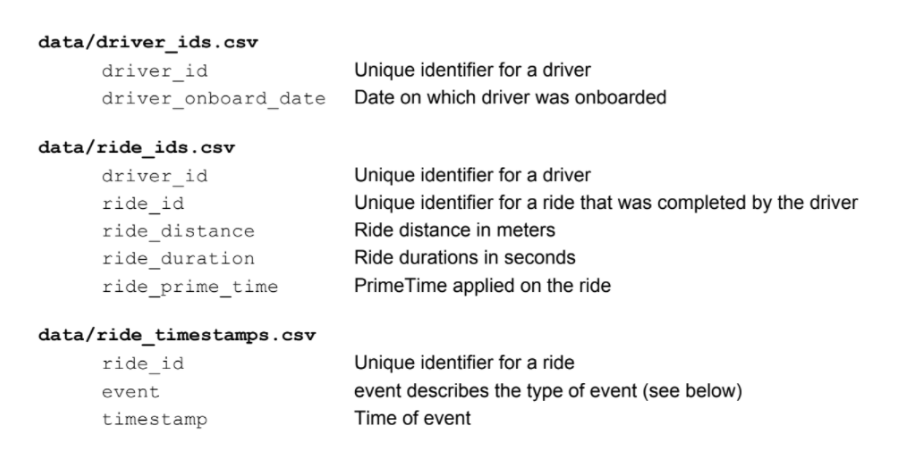


Votre objectif est de répondre à plusieurs questions, en vous basant sur les données que vous avez à disposition.

## Première lecture des DataFrames

In [ ]:
import pandas as pd

df_driver_ids = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/driver_ids.csv", sep = ";")
df_driver_ids

driver_id driver_onboard_date
0    1e9b964b3e3d0289794289579269247a    28/03/2016 00:00
1    479c3dccc06056867dd10c7d9fa0f569    28/03/2016 00:00
2    5c00ecb439cd4e2377e9bb3de84b0e74    28/03/2016 00:00
3    6e70c2024934874d052225a4466fb9c1    28/03/2016 00:00
4    72ca99bb6667024a23e1f68904b06fd0    28/03/2016 00:00
..                                ...                 ...
932  2e5d7b104b570a5cf450f6825880c9dc    15/05/2016 00:00
933  bf2693c5774a77e478e418119be97c5c    15/05/2016 00:00
934  df9ab418e87b21319bdfe389a4552e08    15/05/2016 00:00
935  f98673773627b4b8d152e2b168b85bb2    15/05/2016 00:00
936  fdbee494c73577d5b1266d1fec5c6c9a    15/05/2016 00:00

[937 rows x 2 columns]

In [ ]:
df_driver_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   driver_id            937 non-null    object
 1   driver_onboard_date  937 non-null    object
dtypes: object(2)
memory usage: 14.8+ KB


In [ ]:
df_driver_ids.describe()

driver_id driver_onboard_date
count                                937                 937
unique                               937                  49
top     1e9b964b3e3d0289794289579269247a    05/04/2016 00:00
freq                                   1                  36

In [ ]:
df_ride_ids = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/ride_ids.csv", sep = ";")
df_ride_ids

driver_id                           ride_id  \
0       002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1       002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2       002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3       002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4       002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   
...                                  ...                               ...   
193497  ffff51a71f2f185ec5e97d59dbcd7a78  fc717192b3512767269ff5a54b97af05   
193498  ffff51a71f2f185ec5e97d59dbcd7a78  fd6fa5f9265d2cf83936ead663f9e0e7   
193499  ffff51a71f2f185ec5e97d59dbcd7a78  fe0857c43025264d337dfe1d8463e503   
193500  ffff51a71f2f185ec5e97d59dbcd7a78  ff0db0ca4557bf5b05b4da6f660a1ac1   
193501  ffff51a71f2f185ec5e97d59dbcd7a78  ff7dc29693f8c79ff103d350a7b6c157   

        ride_distance  ride_duration  ride_prime_time  
0                1811            327               50  
1                3362            809                0  
2                3282            572                0  
3               65283           3338               25  
4                4115            823              100  
...               ...            ...              ...  
193497          10127           1336                0  
193498           1908            445                0  
193499           4039            875                0  
193500           4760            777                0  
193501           3751            889              100  

[193502 rows x 5 columns]

In [ ]:
df_ride_ids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   driver_id        193502 non-null  object
 1   ride_id          193502 non-null  object
 2   ride_distance    193502 non-null  int64 
 3   ride_duration    193502 non-null  int64 
 4   ride_prime_time  193502 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


In [ ]:
df_ride_ids.describe()

ride_distance  ride_duration  ride_prime_time
count  193502.000000  193502.000000    193502.000000
mean     6955.218266     858.966099        17.305893
std      8929.444606     571.375818        30.825800
min        -2.000000       2.000000         0.000000
25%      2459.000000     491.000000         0.000000
50%      4015.000000     727.000000         0.000000
75%      7193.000000    1069.000000        25.000000
max    724679.000000   28204.000000       500.000000

In [ ]:
df_ride_timestamps = pd.read_csv("https://github.com/WildCodeSchool/wilddata/raw/main/ride_timestamps.zip", sep = ",")
df_ride_timestamps

ride_id           event            timestamp
0       00003037a262d9ee40e61b5c0718f7f0    requested_at  2016-06-13 09:39:19
1       00003037a262d9ee40e61b5c0718f7f0     accepted_at  2016-06-13 09:39:51
2       00003037a262d9ee40e61b5c0718f7f0      arrived_at  2016-06-13 09:44:31
3       00003037a262d9ee40e61b5c0718f7f0    picked_up_at  2016-06-13 09:44:33
4       00003037a262d9ee40e61b5c0718f7f0  dropped_off_at  2016-06-13 10:03:05
...                                  ...             ...                  ...
970400  ffffccd77f47a3de26dfed9a851464b4    requested_at  2016-05-18 08:44:13
970401  ffffccd77f47a3de26dfed9a851464b4     accepted_at  2016-05-18 08:44:21
970402  ffffccd77f47a3de26dfed9a851464b4      arrived_at  2016-05-18 08:44:36
970403  ffffccd77f47a3de26dfed9a851464b4    picked_up_at  2016-05-18 08:44:42
970404  ffffccd77f47a3de26dfed9a851464b4  dropped_off_at  2016-05-18 09:11:37

[970405 rows x 3 columns]

In [ ]:
df_ride_timestamps.info()

# Il semble ici avoir une valeur nulle dans timestamp.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ride_id    970405 non-null  object
 1   event      970405 non-null  object
 2   timestamp  970404 non-null  object
dtypes: object(3)
memory usage: 22.2+ MB


In [ ]:
df_ride_timestamps.describe()

ride_id         event            timestamp
count                             970405        970405               970404
unique                            194081             5               865826
top     00003037a262d9ee40e61b5c0718f7f0  requested_at  2016-04-30 22:09:15
freq                                   5        194081                    7

In [ ]:
pd.isnull(df_ride_timestamps).sum().sum()

# Il y a bien une valeur nulle...

1

In [ ]:
# Suppression de la valeur nulle (réponse question 9, voir partie suivante)

df_ride_timestamps.dropna(inplace=True)

In [ ]:
df_ride_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970404 entries, 0 to 970404
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ride_id    970404 non-null  object
 1   event      970404 non-null  object
 2   timestamp  970404 non-null  object
dtypes: object(3)
memory usage: 29.6+ MB


## Questions

7. Combien y a-t-il de "drivers" différents ?

In [ ]:
nb_conducteurs_differents = df_driver_ids['driver_id'].nunique()
print("Le nombre de conducteurs différents est :", nb_conducteurs_differents)

Le nombre de conducteurs différents est : 937


In [ ]:
# L'info était également disponible dans le describe effectué précédemment.

df_driver_ids.describe()

driver_id driver_onboard_date
count                                937                 937
unique                               937                  49
top     1e9b964b3e3d0289794289579269247a    05/04/2016 00:00
freq                                   1                  36

8. La société de taxi n'accepte pas les courses de plus de 150 Km. Si il y a des courses de plus de 150 Km dans le DataFrame `df_ride_ids`, elles ne peuvent pas être comptabilisées. Votre objectif est d'exclure les courses qui sont des valeurs aberrantes du point de vue de la société de Taxi.

In [ ]:
# La distance est en mètres. 150 km = 150000 mètres.

df_ride_150000 = df_ride_ids[df_ride_ids['ride_distance'] <= 150000]
df_ride_150000

driver_id                           ride_id  \
0       002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1       002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2       002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3       002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4       002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   
...                                  ...                               ...   
193497  ffff51a71f2f185ec5e97d59dbcd7a78  fc717192b3512767269ff5a54b97af05   
193498  ffff51a71f2f185ec5e97d59dbcd7a78  fd6fa5f9265d2cf83936ead663f9e0e7   
193499  ffff51a71f2f185ec5e97d59dbcd7a78  fe0857c43025264d337dfe1d8463e503   
193500  ffff51a71f2f185ec5e97d59dbcd7a78  ff0db0ca4557bf5b05b4da6f660a1ac1   
193501  ffff51a71f2f185ec5e97d59dbcd7a78  ff7dc29693f8c79ff103d350a7b6c157   

        ride_distance  ride_duration  ride_prime_time  
0                1811            327               50  
1                3362            809                0  
2                3282            572                0  
3               65283           3338               25  
4                4115            823              100  
...               ...            ...              ...  
193497          10127           1336                0  
193498           1908            445                0  
193499           4039            875                0  
193500           4760            777                0  
193501           3751            889              100  

[193497 rows x 5 columns]

Seules cinq courses ont plus de 150 km (193497 / 193502 au total).

In [ ]:
# Tri du dataframe en ordre décroissant par rapport à 'ride_distance' pour vérifier les courses de plus de 150 km
df_ride_ids_tri = df_ride_ids.sort_values(by = 'ride_distance', ascending = False)
df_ride_ids_tri.head()

driver_id                           ride_id  \
1921    02d6a6b8a6da15fc219a9570f7ebbe78  e7f8524051edb7b28e86391f6461bc03   
148556  b9926f42a5fd6cc0c455fe59a21961ab  c4c284d0e1ff48d2c75b60555bfba409   
94650   7419cd5c573ff9994c0f8ff5d92b4408  492fc57131472959769e13bc8ad9fa72   
173387  e0e3594e7d43742458a79799c7a5dd6c  9dda88054abf2e7a32d3727aef662a7f   
147442  b7de2b55859abf8fb49bf393a5a2816a  f44822cf4ff8fd673720f76d5d6487d0   

        ride_distance  ride_duration  ride_prime_time  
1921           724679          28204                0  
148556         276229          11294                0  
94650          172430           7765                0  
173387         156382          19829               50  
147442         150568           9119                0

Ces 5 lignes sont bien les 5 courses dont la distance a dépassé 150 km...

9.  Vérifier le nombre de valeurs manquantes pour chaque colonne de chaque DataFrame. Si il existe des valeurs manquantes, il faut les exclure de leur DataFrame.

In [ ]:
"""La réponse se trouve dans la partie précédente : Premières lectures des DataFrames.

Il y avait bien une valeur manquante dans df_ride_timestamps, qui a été supprimée.
Les eux autres n'en possédaient pas."""

"La réponse se trouve dans la partie précédente : Premières lectures des DataFrames.\n\nIl y avait bien une valeur manquante dans df_ride_timestamps, qui a été supprimée.\nLes eux autres n'en possédaient pas."

10. Quelle est la durée de la course la plus longue ? Pour répondre, créer dans un premier temps une colonne qui convertit le temps donné en seconde, en minutes, arrondi à deux valeurs après la virgule. Par exemple, 100 secondes == 1.67 minutes. Enfin, ne faire apparaître que la ligne qui contient la durée de course la plus longue.

In [ ]:
# Conversion du temps donné en secondes et minutes, arrondi à deux chiffres après la virgule

df_ride_ids['ride_duration_min'] = (df_ride_ids['ride_duration'] / 60).round(2)
df_ride_ids

driver_id                           ride_id  \
0       002be0ffdc997bd5c50703158b7c2491  006d61cf7446e682f7bc50b0f8a5bea5   
1       002be0ffdc997bd5c50703158b7c2491  01b522c5c3a756fbdb12e95e87507eda   
2       002be0ffdc997bd5c50703158b7c2491  029227c4c2971ce69ff2274dc798ef43   
3       002be0ffdc997bd5c50703158b7c2491  034e861343a63ac3c18a9ceb1ce0ac69   
4       002be0ffdc997bd5c50703158b7c2491  034f2e614a2f9fc7f1c2f77647d1b981   
...                                  ...                               ...   
193497  ffff51a71f2f185ec5e97d59dbcd7a78  fc717192b3512767269ff5a54b97af05   
193498  ffff51a71f2f185ec5e97d59dbcd7a78  fd6fa5f9265d2cf83936ead663f9e0e7   
193499  ffff51a71f2f185ec5e97d59dbcd7a78  fe0857c43025264d337dfe1d8463e503   
193500  ffff51a71f2f185ec5e97d59dbcd7a78  ff0db0ca4557bf5b05b4da6f660a1ac1   
193501  ffff51a71f2f185ec5e97d59dbcd7a78  ff7dc29693f8c79ff103d350a7b6c157   

        ride_distance  ride_duration  ride_prime_time  ride_duration_min  
0                1811            327               50               5.45  
1                3362            809                0              13.48  
2                3282            572                0               9.53  
3               65283           3338               25              55.63  
4                4115            823              100              13.72  
...               ...            ...              ...                ...  
193497          10127           1336                0              22.27  
193498           1908            445                0               7.42  
193499           4039            875                0              14.58  
193500           4760            777                0              12.95  
193501           3751            889              100              14.82  

[193502 rows x 6 columns]

In [ ]:
# Quelle est la course qui a la durée la plus longue ? Utilisation de max pour trouver la ligne

course_longue = df_ride_ids[df_ride_ids['ride_duration_min'] == df_ride_ids['ride_duration_min'].max()]
course_longue

driver_id                           ride_id  \
1921  02d6a6b8a6da15fc219a9570f7ebbe78  e7f8524051edb7b28e86391f6461bc03   

      ride_distance  ride_duration  ride_prime_time  ride_duration_min  
1921         724679          28204                0             470.07

Note, cela correspond bien à la première ligne affiché dans la question précédente, ce qui est logique, puisque plus une course a de la distance, plus elle semble longue. Elle semble faire partie des anomalies.

11. Quelle est la moyenne de la distance parcourue, considérant l'ensemble des courses contenu dans `df_ride_ids`, en km ?

In [ ]:
# Moyenne de la distance parcourue en mèters, à l'aide de mean

moy_distance_metres = df_ride_ids['ride_distance'].mean()
moy_distance_metres

6955.218266477866

In [ ]:
# Note : cette information correspind à ce que l'on trouve dans le describe effectué précédemment.

df_ride_ids.describe()

ride_distance  ride_duration  ride_prime_time  ride_duration_min
count  193502.000000  193502.000000    193502.000000      193502.000000
mean     6955.218266     858.966099        17.305893          14.316099
std      8929.444606     571.375818        30.825800           9.522933
min        -2.000000       2.000000         0.000000           0.030000
25%      2459.000000     491.000000         0.000000           8.180000
50%      4015.000000     727.000000         0.000000          12.120000
75%      7193.000000    1069.000000        25.000000          17.820000
max    724679.000000   28204.000000       500.000000         470.070000

In [ ]:
# Conversion en km, arrondi à deux décimales

moy_distance_km = moy_distance_metres / 1000
moy_distance_km.round(2)

6.96

La moyenne est très proche de 7 km. Les trajets très courts semblent privilégiés.

---

## Regex

12. Utiliser la librairie `re` (Regular Expression) pour extraire le nombre de kilomètres parcourus ci-dessous, à l'aide d'une fonction que vous allez créer:

In [ ]:
import re

In [ ]:
# Fonction

def extraire_km(text):
    pattern = r'(\d+)\s*Km'
    match = re.search(pattern, text)
    if match : # condition if qui va retourner un entier ou pas
        return int(match.group(1))
    return None

In [ ]:
# Test de la fonction

text = "Certains conducteurs de taxi comptabilisent plus de 500 courses, et ont parcourus plus de 5000 Km."

test = extraire_km(text)
print(f"Nb de kms parcourus : {test}")

Nb de kms parcourus : 5000


## Méthode Agile SCRUM



13.  Dans le cadre de l'utilisation de la méthode agile SCRUM, quelle est la différence entre le scrum master et le product owner ?

*Réponse*:

Product Owner et Scrum Master sont deux des rôles présents dans la méthode agile SCRUM (avec l'équipe de développement). Ce dernier est l'un des Framework agiles les plus utilisés.

- Le Scrum Master est un facilitateur. Il permet d'animer et d'aider au maximum l'équipe, tout en s'assurant que le framework Scrum est respecté. Il met tout en oeuvre pour que les objectifs soient atteints.

- Le Product Owner, quant à lui, possède la vision du client et du produit. Son rôle principal est de filtrer, attribuer et prioriser la tâche (les témoignages d'utilisateurs) en tenant compte de leur impact potentiel sur l'entreprise.

---

# Machine Learning _(4 heures)_

## Sélection de données et NLP *(30 minutes)*

Dans ce cas pratique Machine Learning, votre objectif sera de créer un modèle capable de prédire le prix que doivent payer des clients souscrivant à une assurance vie. Vous utiliserez le DataFrame `df_insurance`.

In [ ]:
import pandas as pd

df_insurance_reg = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/Insurance.csv")
df_insurance_reg

age     sex     bmi  children  smoker     region      charges  \
0      19  female  27.900         0    True  southwest  16884.92400   
1      18    male  33.770         1   False  southeast   1725.55230   
2      28    male  33.000         3   False  southeast   4449.46200   
3      33    male  22.705         0   False  northwest  21984.47061   
4      32    male  28.880         0   False  northwest   3866.85520   
...   ...     ...     ...       ...     ...        ...          ...   
1333   50    male  30.970         3   False  northwest  10600.54830   
1334   18  female  31.920         0   False  northeast   2205.98080   
1335   18  female  36.850         0   False  southeast   1629.83350   
1336   21  female  25.800         0   False  southwest   2007.94500   
1337   61  female  29.070         0    True  northwest  29141.36030   

     price_range  
0      expensive  
1          cheap  
2          cheap  
3      expensive  
4          cheap  
...          ...  
1333       cheap  
1334       cheap  
1335       cheap  
1336       cheap  
1337   expensive  

[1338 rows x 8 columns]

In [ ]:
# Suppression de la colonne price_range

df_insurance_reg.drop(columns="price_range", inplace = True)
df_insurance_reg

age     sex     bmi  children  smoker     region      charges
0      19  female  27.900         0    True  southwest  16884.92400
1      18    male  33.770         1   False  southeast   1725.55230
2      28    male  33.000         3   False  southeast   4449.46200
3      33    male  22.705         0   False  northwest  21984.47061
4      32    male  28.880         0   False  northwest   3866.85520
...   ...     ...     ...       ...     ...        ...          ...
1333   50    male  30.970         3   False  northwest  10600.54830
1334   18  female  31.920         0   False  northeast   2205.98080
1335   18  female  36.850         0   False  southeast   1629.83350
1336   21  female  25.800         0   False  southwest   2007.94500
1337   61  female  29.070         0    True  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
df_insurance_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 64.2+ KB


In [ ]:
df_insurance_reg.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.684932     1.094918  13270.422265
std      14.049960     6.070713     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.336250     0.000000   4740.287150
50%      39.000000    30.495000     1.000000   9382.033000
75%      51.000000    34.600000     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

 14. On aimerait enrichir notre jeu de données avec une variable qui contient du texte pour chaque ligne. Citez un nom de variable explicite, qui permettrait d'enrichir notre jeu de données. En quoi cette variable de texte constituerait une valeur ajoutée pour le jeu de données `df_insurance`.  Si vous pourriez créer cette colonne, comment est-ce que vous procéderiez techniquement pour l'exploiter ? Est-ce que cette variable de texte pourrait avoir un impact conséquent sur les performances d'un modèle de prédiction ? Si oui, pourquoi ?



*Réponse*:


Dans les jeux de données, nous trouvons souvent une variable liées à l'historique

Ici, nous pourrions avoir une variable nommée medical_history, qui aurait pour but d'obtenir un résumé sur les antécédents médicaux du client (diagnostics, traitements, hospitalisations, etc.), afin de mieux cerner son passé et son état de santé.

Cette variable aiderait le modèle de prédiction car nous pourrons observer plus précisément le risque associé à chaque client, ce qui fait que le prix de l'assurance pourra être plus ou moins élevé, qui ne pourraient pas forcément être visibles avec les variables numériques que nous avons actuellement.

Bémol : il s'agit d'une information très sensible.

Sinon, il yaurait toujours la possibilité de se rabattre sur une variable comme la profession du client.

Pour l'exploiter, j'utiliserai Python (NLP) et plus particulièrement la bibliothèque ntlk, avec les étapes suivantes :        
- Prétraitement du texte : tokenisation, nettoyage des stop words et erreurs de saisie si elles existent
- Vectorisation : transformation du texte pour que le modèle puisse interpréter (tfidf)
- Rattachement de cette variable au DF principal (avec un concat).

## Partie Machine Learning - Regression _(1 heure 45 minutes)_

 15. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire le prix que doit payer chaque client pour souscrire à l'assurance.
- `X` peut être composé de variables que vous avez choisis, parmi `age`, `sex`, `bmi`, `children`, `smoker`. **La colonne `region` doit obligatoirement être intégré dans X.**
- `y` est la variable `charges`.


In [ ]:
# Rappel :

df_insurance_reg.head()

age     sex     bmi  children  smoker     region      charges
0   19  female  27.900         0    True  southwest  16884.92400
1   18    male  33.770         1   False  southeast   1725.55230
2   28    male  33.000         3   False  southeast   4449.46200
3   33    male  22.705         0   False  northwest  21984.47061
4   32    male  28.880         0   False  northwest   3866.85520

In [ ]:
# Création de X : les caractéristiques

X = df_insurance_reg[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X

age     sex     bmi  children  smoker     region
0      19  female  27.900         0    True  southwest
1      18    male  33.770         1   False  southeast
2      28    male  33.000         3   False  southeast
3      33    male  22.705         0   False  northwest
4      32    male  28.880         0   False  northwest
...   ...     ...     ...       ...     ...        ...
1333   50    male  30.970         3   False  northwest
1334   18  female  31.920         0   False  northeast
1335   18  female  36.850         0   False  southeast
1336   21  female  25.800         0   False  southwest
1337   61  female  29.070         0    True  northwest

[1338 rows x 6 columns]

In [ ]:
# y est la varible cible

y = df_insurance_reg['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
# Factorisation des colonnes 'sex' et 'smoker' en 0 et 1 avec map pour transformer les catégories
X.loc[:, 'sex'] = X['sex'].map({'female': 0, 'male': 1})
X.loc[:, 'smoker'] = X['smoker'].map({False: 0, True: 1})
X

age sex     bmi  children  smoker     region
0      19   0  27.900         0       1  southwest
1      18   1  33.770         1       0  southeast
2      28   1  33.000         3       0  southeast
3      33   1  22.705         0       0  northwest
4      32   1  28.880         0       0  northwest
...   ...  ..     ...       ...     ...        ...
1333   50   1  30.970         3       0  northwest
1334   18   0  31.920         0       0  northeast
1335   18   0  36.850         0       0  southeast
1336   21   0  25.800         0       0  southwest
1337   61   0  29.070         0       1  northwest

[1338 rows x 6 columns]

16. La colonne `region` contient plusieurs valeurs discrètes, représentant des secteurs géographiques. Il est donc nécessaire de créer autant de colonnes qu'il y a de valeurs distinctes pour cette colonne. Aussi, il faudra supprimer la colonne `region` pour ne garder que les colonnes qui ont été générées à partir de cette dernière.

In [ ]:
# Utilisation de get dummies

X = pd.get_dummies(X, columns=['region'], drop_first=False)
X

age sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19   0  27.900         0       1             False             False   
1      18   1  33.770         1       0             False             False   
2      28   1  33.000         3       0             False             False   
3      33   1  22.705         0       0             False              True   
4      32   1  28.880         0       0             False              True   
...   ...  ..     ...       ...     ...               ...               ...   
1333   50   1  30.970         3       0             False              True   
1334   18   0  31.920         0       0              True             False   
1335   18   0  36.850         0       0             False             False   
1336   21   0  25.800         0       0             False             False   
1337   61   0  29.070         0       1             False              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  
2                 True             False  
3                False             False  
4                False             False  
...                ...               ...  
1333             False             False  
1334             False             False  
1335              True             False  
1336             False              True  
1337             False             False  

[1338 rows x 9 columns]

La colonne region a été supprimée automatiquement.

17.  Séparer les données en jeu d'entraînement et jeu de test, avec `random_state = 0`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print("La longueur du jeu de données initial est :", len(X))
print("La longueur du jeu de données d'entraîneemnt :", len(X_train))
print("La longueur du jeu de données de test est : ", len(X_test))

La longueur du jeu de données initial est : 1338
La longueur du jeu de données d'entraîneemnt : 1003
La longueur du jeu de données de test est :  335


18. Importer le modèle `Linear Regression` de la librairie `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Création de l'instance du modèle
modelLR = LinearRegression()

19. Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

In [ ]:
# Entraînement du modèle sur les données d'entraînement
modelLR.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Exploration du modèle :

print("coefficient :",modelLR.coef_)
print("intercept :", modelLR.intercept_)

coefficient : [ 2.49782078e+02  2.17406769e+01  3.34674842e+02  4.36047438e+02
  2.36210980e+04  5.53246545e+02  3.32838832e+02 -5.51796925e+02
 -3.34288452e+02]
intercept : -12099.822487306044


In [ ]:
# Affichage du score
print("R2 score sur le jeu de test : ", modelLR.score(X_test, y_test))

R2 score sur le jeu de test :  0.7958563663914465


In [ ]:
# print("Score sur le jeu d'entraînement :", modelLR.score(X_train, y_train))

Score sur le jeu d'entraînement : 0.7339406094639234


_Réponse_:

En me basant sur les variables incluses dans X ('age', 'sex', 'bmi', 'children', 'smoker', 'region', j'obtiens un score R² de 0,79. Il s'agit du coefficient de détermination.

Cela veut dire que le modèle explique 79,59 % de la variance des charges, ce qui est un bon modèle.

20. Expliquer et vulgariser le fonctionnement interne de l'algorithme, pour qu'il puisse faire ses prédictions.
Expliquer aussi quelles sont la, ou le(s) variable(s) utilisé par l'algorithme pour faire ses prédictions de prix.

Réponse:

On cherche à savoir combien chaque client va payer son assurance.

Une régression linéaire est un graphique comprenant une droite et des points avec des informations données.

Cette droite indique les prix d'assurance pour chaque client.

Les variables utilisées par l'algorithme pour prédire les prix sont : l'age, le sexe, le bmi, le fait d'avoir des enfants ou non, si le client est fumeur ou non et sa région.




> 21. Afficher la matrice de corrélation pour `df_insurance_reg`. Quelles sont les deux variables qui ont la corrélation la plus élevée avec `y`, c'est-à-dire "charges" ?

*Réponse:*


In [ ]:
correlation_matrix = df_insurance_reg.corr()
correlation_matrix

ValueError: could not convert string to float: 'female'

In [ ]:
# Transformation en variables catégorielles :
df_insurance_reg['sex'] = df_insurance_reg['sex'].map({'female': 0, 'male': 1})
df_insurance_reg['smoker'] = df_insurance_reg['smoker'].map({False: 0, True: 1})
df_insurance_reg

age  sex     bmi  children  smoker     region      charges
0      19    0  27.900         0       1  southwest  16884.92400
1      18    1  33.770         1       0  southeast   1725.55230
2      28    1  33.000         3       0  southeast   4449.46200
3      33    1  22.705         0       0  northwest  21984.47061
4      32    1  28.880         0       0  northwest   3866.85520
...   ...  ...     ...       ...     ...        ...          ...
1333   50    1  30.970         3       0  northwest  10600.54830
1334   18    0  31.920         0       0  northeast   2205.98080
1335   18    0  36.850         0       0  southeast   1629.83350
1336   21    0  25.800         0       0  southwest   2007.94500
1337   61    0  29.070         0       1  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
# Get dummies pour la colonne région
df_insurance_reg = pd.get_dummies(df_insurance_reg, columns=['region'], drop_first=True)

In [ ]:
correlation_matrix = df_insurance_reg.corr()
correlation_matrix

age       sex       bmi  children    smoker   charges  \
age               1.000000 -0.020856  0.112383  0.042469 -0.025019  0.299008   
sex              -0.020856  1.000000  0.044399  0.017163  0.076185  0.057292   
bmi               0.112383  0.044399  1.000000  0.014931  0.008493  0.202802   
children          0.042469  0.017163  0.014931  1.000000  0.007673  0.067998   
smoker           -0.025019  0.076185  0.008493  0.007673  1.000000  0.787251   
charges           0.299008  0.057292  0.202802  0.067998  0.787251  1.000000   
region_northwest -0.000407 -0.011156 -0.133083  0.024806 -0.036945 -0.039905   
region_southeast -0.011642  0.017117  0.271693 -0.023066  0.068498  0.073982   
region_southwest  0.010016 -0.004184 -0.006529  0.021914 -0.036945 -0.043210   

                  region_northwest  region_southeast  region_southwest  
age                      -0.000407         -0.011642          0.010016  
sex                      -0.011156          0.017117         -0.004184  
bmi                      -0.133083          0.271693         -0.006529  
children                  0.024806         -0.023066          0.021914  
smoker                   -0.036945          0.068498         -0.036945  
charges                  -0.039905          0.073982         -0.043210  
region_northwest          1.000000         -0.346265         -0.320829  
region_southeast         -0.346265          1.000000         -0.346265  
region_southwest         -0.320829         -0.346265          1.000000

La plus forte corrélation de 'charges' est avec la colonne 'smoker', ce qui semble logique, puisqu'un fumeur a plus de chances de tomber malade, donc son assurance devrait être plus chère.

## Partie Machine Learning - Classification _(1 heure 45 minutes)_



In [ ]:
import pandas as pd

df_insurance_cls = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/Insurance.csv")
df_insurance_cls

age     sex     bmi  children  smoker     region      charges  \
0      19  female  27.900         0    True  southwest  16884.92400   
1      18    male  33.770         1   False  southeast   1725.55230   
2      28    male  33.000         3   False  southeast   4449.46200   
3      33    male  22.705         0   False  northwest  21984.47061   
4      32    male  28.880         0   False  northwest   3866.85520   
...   ...     ...     ...       ...     ...        ...          ...   
1333   50    male  30.970         3   False  northwest  10600.54830   
1334   18  female  31.920         0   False  northeast   2205.98080   
1335   18  female  36.850         0   False  southeast   1629.83350   
1336   21  female  25.800         0   False  southwest   2007.94500   
1337   61  female  29.070         0    True  northwest  29141.36030   

     price_range  
0      expensive  
1          cheap  
2          cheap  
3      expensive  
4          cheap  
...          ...  
1333       cheap  
1334       cheap  
1335       cheap  
1336       cheap  
1337   expensive  

[1338 rows x 8 columns]

In [ ]:
df_insurance_cls.drop(columns="charges", inplace = True)
df_insurance_cls

age     sex     bmi  children  smoker     region price_range
0      19  female  27.900         0    True  southwest   expensive
1      18    male  33.770         1   False  southeast       cheap
2      28    male  33.000         3   False  southeast       cheap
3      33    male  22.705         0   False  northwest   expensive
4      32    male  28.880         0   False  northwest       cheap
...   ...     ...     ...       ...     ...        ...         ...
1333   50    male  30.970         3   False  northwest       cheap
1334   18  female  31.920         0   False  northeast       cheap
1335   18  female  36.850         0   False  southeast       cheap
1336   21  female  25.800         0   False  southwest       cheap
1337   61  female  29.070         0    True  northwest   expensive

[1338 rows x 7 columns]

In [ ]:
df_insurance_cls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   bool   
 5   region       1338 non-null   object 
 6   price_range  1338 non-null   object 
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 64.2+ KB


In [ ]:
df_insurance_cls.describe()

age          bmi     children
count  1338.000000  1338.000000  1338.000000
mean     39.207025    30.684932     1.094918
std      14.049960     6.070713     1.205493
min      18.000000    15.960000     0.000000
25%      27.000000    26.336250     0.000000
50%      39.000000    30.495000     1.000000
75%      51.000000    34.600000     2.000000
max      64.000000    53.130000     5.000000

22. Créer `X` et `y` en vue d'entraîner un modèle capable de prédire si, pour chaque client, il faut payer "pas cher" ou "cher".
- `X` peut être composé de variables que vous avez choisis, parmi `age`, `sex`, `bmi`, `children`, `smoker`. **La colonne `region` doit obligatoirement être intégré dans X.**
- `y` est la variable `price_range`.



In [ ]:
# Sélection des caractéristiques pour X
X = df_insurance_cls[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
X

age     sex     bmi  children  smoker     region
0      19  female  27.900         0    True  southwest
1      18    male  33.770         1   False  southeast
2      28    male  33.000         3   False  southeast
3      33    male  22.705         0   False  northwest
4      32    male  28.880         0   False  northwest
...   ...     ...     ...       ...     ...        ...
1333   50    male  30.970         3   False  northwest
1334   18  female  31.920         0   False  northeast
1335   18  female  36.850         0   False  southeast
1336   21  female  25.800         0   False  southwest
1337   61  female  29.070         0    True  northwest

[1338 rows x 6 columns]

In [ ]:
# Sélection de la cible y : price_range
y = df_insurance_cls['price_range']
y

0       expensive
1           cheap
2           cheap
3       expensive
4           cheap
          ...    
1333        cheap
1334        cheap
1335        cheap
1336        cheap
1337    expensive
Name: price_range, Length: 1338, dtype: object

In [ ]:
# Factorisation des colonnes 'sex' et 'smoker' en 0 et 1 avec map pour transformer les catégories
X.loc[:, 'sex'] = X['sex'].map({'female': 0, 'male': 1})
X.loc[:, 'smoker'] = X['smoker'].map({False: 0, True: 1})
X

age sex     bmi  children  smoker     region
0      19   0  27.900         0       1  southwest
1      18   1  33.770         1       0  southeast
2      28   1  33.000         3       0  southeast
3      33   1  22.705         0       0  northwest
4      32   1  28.880         0       0  northwest
...   ...  ..     ...       ...     ...        ...
1333   50   1  30.970         3       0  northwest
1334   18   0  31.920         0       0  northeast
1335   18   0  36.850         0       0  southeast
1336   21   0  25.800         0       0  southwest
1337   61   0  29.070         0       1  northwest

[1338 rows x 6 columns]

In [ ]:
# Utilisation de get dummies sur region

X = pd.get_dummies(X, columns=['region'], drop_first=False)
X

age sex     bmi  children  smoker  region_northeast  region_northwest  \
0      19   0  27.900         0       1             False             False   
1      18   1  33.770         1       0             False             False   
2      28   1  33.000         3       0             False             False   
3      33   1  22.705         0       0             False              True   
4      32   1  28.880         0       0             False              True   
...   ...  ..     ...       ...     ...               ...               ...   
1333   50   1  30.970         3       0             False              True   
1334   18   0  31.920         0       0              True             False   
1335   18   0  36.850         0       0             False             False   
1336   21   0  25.800         0       0             False             False   
1337   61   0  29.070         0       1             False              True   

      region_southeast  region_southwest  
0                False              True  
1                 True             False  
2                 True             False  
3                False             False  
4                False             False  
...                ...               ...  
1333             False             False  
1334             False             False  
1335              True             False  
1336             False              True  
1337             False             False  

[1338 rows x 9 columns]

23. Séparer les données en jeu d'entraînement et jeu de test, avec random_state = 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print("La longueur du jeu de données initial est :", len(X))
print("La longueur du jeu de données d'entraînement :", len(X_train))
print("La longueur du jeu de données de test est : ", len(X_test))

La longueur du jeu de données initial est : 1338
La longueur du jeu de données d'entraînement : 1003
La longueur du jeu de données de test est :  335


24. Importer le modèle de votre choix pour faire de la classification.

In [ ]:
# Importer Decision Tree, qui est celui qui a été enseigné à la WCS

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Créer une instance du modèle de Decision Tree
modelDT = DecisionTreeClassifier()

25.  Entraîner le modèle sur le jeu d'entraînement, puis évaluer les performances du modèle sur le jeu de test. A l'écrit, interpréter le score obtenu, et donner le nom de la métrique utilisé par défaut pour évaluer le score du modèle.

In [ ]:
# Entraînement du modèle sur les données d'entraînement
modelDT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Affichage du score
print("Score sur le jeu de test : ", modelDT.score(X_test, y_test))

Score sur le jeu de test :  0.844776119402985


In [ ]:
# print("Score sur le jeu d'entraînement :", modelDT.score(X_train, y_train))

Score sur le jeu d'entraînement : 0.9990029910269193


Réponse:

Ce score est l'accuracy.

Pour près de 85% du temps, le modèle a pu prédire correctement si le prix de l'assurance est 'cher' ou 'pas cher' pour les clients.

26. On exploite ici des données pour le jeu d'entraînement, et des données pour le jeu de test. Quelles sont les limites de cette méthode ?

*Réponse*:


La première limite est l'overfitting (sur-apprentissage), qui est possible dans les decision trees, c'est-à-dire que le modèle s'adapte trop bien aux données d'entraînement (c'est le cas ici) mais qui se généralise mal sur les données de test.

Il existe également underfitting (sous-apprentissage), qui, quant à lui s'adapte mal aux données d'entraînement.

La taille des ensembles d'entraînement et de test peut aussi influencer les performances du modèle.
- Un trop petit ensemble de test peut ne pas être suffisant pour évaluer de manière fiable la généralisation du modèle.
- Un trop petit ensemble d'entraînement peut ne pas fournir suffisamment de données pour bien entraîner le modèle.

Utiliser répétitivement un ensemble de test pour ajuster le modèle peut conduire à des performances surévaluées.

27. Afficher la matrice de confusion (`confusion matrix`) et la commenter. Expliquer les métriques `precision` et `recall`.

*Réponse*:






In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# Prédiction des valeurs pour le jeu de test
y_pred = modelDT.predict(X_test)
y_pred

array(['cheap', 'cheap', 'expensive', 'expensive', 'cheap', 'expensive',
       'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'expensive', 'cheap',
       'cheap', 'expensive', 'expensive', 'cheap', 'cheap', 'cheap',
       'expensive', 'expensive', 'cheap', 'cheap', 'expensive', 'cheap',
       'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'expensive',
       'cheap', 'cheap', 'expensive', 'cheap', 'cheap', 'expensive',
       'expensive', 'cheap', 'cheap', 'cheap', 'expensive', 'expensive',
       'expensive', 'cheap', 'expensive', 'cheap', 'cheap', 'cheap',
       'cheap', 'expensive', 'expensive', 'expensive', 'cheap', 'cheap',
       'cheap', 'cheap', 'cheap', 'cheap', 'cheap', 'expensive',
       'expensive', 'cheap', 'cheap', 'cheap', 'expensive', 'expensive',
       'cheap', 'cheap', 'expensive', 'cheap', 'expensive', 'expensive',
       'cheap', 'cheap', 'cheap', 'cheap', 'expensive', 'expensive',
       'cheap', 'expensive', 'cheap', 'cheap', 'expensive', 'expensive',


In [ ]:
pd.DataFrame(data = confusion_matrix(y_true = y_test, y_pred = modelDT.predict(X_test)),
             index = modelDT.classes_ + " ACTUAL",
             columns = modelDT.classes_ + " PREDICTED")

cheap PREDICTED  expensive PREDICTED
cheap ACTUAL                  201                   32
expensive ACTUAL               20                   82

- Le modèle a prédit correctement "cheap" 201 fois où le prix était vraiment "cheap".
- Le modèle a prédit correctement "expensive" 82 fois où le prix était vraiment "expensive".
- Le modèle a prédit "expensive" 20 fois alors que le prix était en réalité "cheap".
- Le modèle a prédit "cheap" 32 fois alors que le prix était en réalité "expensive".


In [ ]:
# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       cheap       0.91      0.86      0.89       233
   expensive       0.72      0.80      0.76       102

    accuracy                           0.84       335
   macro avg       0.81      0.83      0.82       335
weighted avg       0.85      0.84      0.85       335



***Précision*** :

- Pour 'cheap' : La précision est de 0.91. 91 % des prédictions annoncées comme "cheap" par le modèle étaient vraiment 'cheap'.
- Pour 'expensive' : La précision est de 0.72. 72 % des prédictions annoncées comme "expensive" étaient vraiment 'expensive'.

***Recall*** :
- Pour "cheap" : Le rappel est de 0.86. Le modèle a correctement identifié 86 % de toutes les instances réelles de "cheap".
- Pour "expensive" : Le rappel est de 0.80. Le modèle a correctement identifié 80 % de toutes les instances réelles de "expensive".

---

# Business Case - Sales Bicycle _(8 heures)_

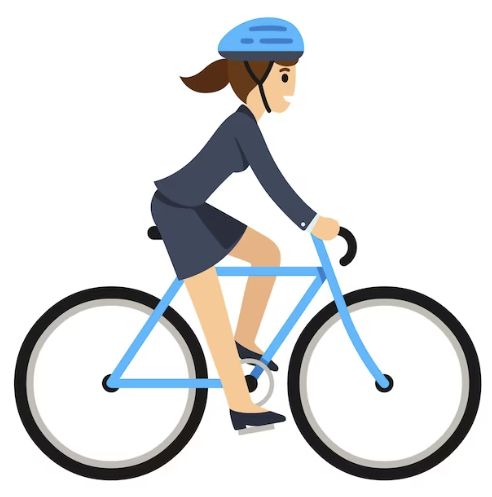

## Contexte


Vous désirez créer et développer votre entreprise, de taille modeste et être implanté physiquement, en tant que magasin autour du thème "vélo". Vous n'avez que trop peu d'argent pour pouvoir monter votre société sereinement.  


C'est pourquoi vous allez participer à une levée de fonds pour obtenir les ressources financières nécessaires au démarrage et au développement de votre entreprise.  




## Votre mission

Objectif :  
Convaincre les investisseurs de miser sur vous en répondant à la problématique suivante:   
**Comment créer et développer efficacement un petit magasin spécialisé dans le domaine du vélo, en se positionnant de manière stratégique sur le marché, tout en maximisant l'attrait pour les investisseurs?"**

 Vous pouvez vous focalisez sur la spécialisation dans un domaine (vélo, accessoires...) ou bien encore dans un type de pratique spécifique (route, montagne...). Soyez créatif, mais n'oubliez pas que vous êtes un petit magasin. Un petit magasin généraliste ne peut pas fournir des produits recherchés... Cependant, rien ne vous empêche de vous positionner aussi comme un petit magasin généraliste... ce qui compte, c'est d'être convaincant, et de présenter bons nombres d'arguments en vous appuyant sur le jeu de données que vous avez à disposition.

Vous allez dans un premier temps explorer le jeu de données, dans le but d'explorer plusieurs possibilités de choix. Une fois que votre choix est fait, lancez-vous dans l'élaboration de votre tableau de bord, dans le but de convaincre un maximum les investisseurs.

Pour mettre toutes les chances de votre côté et séduire les investisseurs, vous allez devoir faire les bons choix. Voici quelques idées pour vous inspirer:
- Vendre des produits rentables
- Vendre des produits en quantité
- Se positionner sur des produits en vogue
- Choisir un emplacement géographique propice à de fortes ventes
- Prendre en considération l'évolution des tendances de ventes dans le temps
- Se spécialiser dans la vente de pièces ou d'accessoires
- Se spécialiser sur des cibles jeunes ou seniors

En plus de fournir une analyse complète qui vous permettra d'appuyer vos choix concernant l'entreprise que vous aimeriez développer, prenez soin d'indiquer précisément où vous souhaiter être implanté physiquement. N'oubliez pas que les investisseurs, qui veulent bien placer leur argent, ne manqueront pas de soulever des points précis, pour s'assurer que votre activité soit rentable à coups sûr.  
Comme dis plus haut, soyez créatif !  
Par exemple, vous pourriez indiquer que vous vous concentrez sur des produits ne rapportant que de petites marges, mais en vous implantant dans une zone où il y a beaucoup de concours de vélo à l'année, car vous êtes certains d'avoir une clientèle de passage très importante, qui a toujours besoin de renouveler tel ou tel accéssoire avant la compétition...  
Ne manquez pas d'étoffer vos arguments, et d'être étincelant le jour J ;)




**Vous devrez faire une présentation dans un premier temps sous slides, qui contient au minimum le contexte, la problématique, ainsi que la conclusion qui contient vos ARGUMENTS pour retenir l'attention des investisseurs. Aussi, vous utiliserez un dashboard pour convaincre les investisseurs, pour qu'ils puissent visualiser votre analyse et vos arguments. Pour rappel, l'argumentation est l'élément central d'une présentation réalisée par un data analyst. En effet, à vous d'être convaincant, pour que vos arguments soient entendus. Il est donc nécessaire de développer un minimum d'expertise métier sur le sujet, pour être à l'aise.** Les investisseurs ne sont pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer vos choix sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.
Le juré examinateur, lors de la partie question, peut vous poser des questions sur le code qui est contenu dans votre google colab. Il est donc indispensable de mettre à disposition dans les pièces soumises pour le passage oral, votre travail exploratoire contenu dans un google colab.



## Livrables attendus
Les investisseurs souhaitent une présentation avec des slides (sous format pdf) et un tableau de bord intéractif (Power BI, Tableau ou autre outil de BI).  

La présentation contiendra à minima ces éléments :
- Rappel du contexte et de la problématique
- Arguments
- Analyse exploratoire des données
- Méthodologie, outils et langages utilisés
- Votre tableau de bord contient des graphiques.
- Votre tableau de bord contient au moins une visualisation de données interactive.
- Votre tableau de bord contient au moins une carte représentant des informations géographiques.
- Votre tableau de bord contient au moins un tableau croisé.
- L'ensemble des graphiques et visuels doit être lisible par tous (prise en compte des personnes en situation de handicap visuel).
- Réponse à la question métier : Comment créer et développer efficacement un petit magasin spécialisé dans le domaine du vélo, en se positionnant de manière stratégique sur le marché, tout en maximisant l'attrait pour les investisseurs?

# C'est parti ! Importer les données

Exécutes les cellules ci-dessous pour récupérer les tables de données.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/sales_bicycles.csv").drop(columns = ["Unnamed: 0", "Day", "Month", "Year"] )
sales_df

Date  Customer_Age       Age_Group Customer_Gender  \
0       2013-11-26            19     Youth (<25)               M   
1       2015-11-26            19     Youth (<25)               M   
2       2014-03-23            49  Adults (35-64)               M   
3       2016-03-23            49  Adults (35-64)               M   
4       2014-05-15            47  Adults (35-64)               F   
...            ...           ...             ...             ...   
113031  2016-04-12            41  Adults (35-64)               M   
113032  2014-04-02            18     Youth (<25)               M   
113033  2016-04-02            18     Youth (<25)               M   
113034  2014-03-04            37  Adults (35-64)               F   
113035  2016-03-04            37  Adults (35-64)               F   

               Country             State Product_Category Sub_Category  \
0               Canada  British Columbia      Accessories   Bike Racks   
1               Canada  British Columbia      Accessories   Bike Racks   
2            Australia   New South Wales      Accessories   Bike Racks   
3            Australia   New South Wales      Accessories   Bike Racks   
4            Australia   New South Wales      Accessories   Bike Racks   
...                ...               ...              ...          ...   
113031  United Kingdom           England         Clothing        Vests   
113032       Australia        Queensland         Clothing        Vests   
113033       Australia        Queensland         Clothing        Vests   
113034          France     Seine (Paris)         Clothing        Vests   
113035          France     Seine (Paris)         Clothing        Vests   

                    Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  \
0       Hitch Rack - 4-Bike               8         45         120     590   
1       Hitch Rack - 4-Bike               8         45         120     590   
2       Hitch Rack - 4-Bike              23         45         120    1366   
3       Hitch Rack - 4-Bike              20         45         120    1188   
4       Hitch Rack - 4-Bike               4         45         120     238   
...                     ...             ...        ...         ...     ...   
113031      Classic Vest, S               3         24          64     112   
113032      Classic Vest, M              22         24          64     655   
113033      Classic Vest, M              22         24          64     655   
113034      Classic Vest, L              24         24          64     684   
113035      Classic Vest, L              23         24          64     655   

        Cost  Revenue  
0        360      950  
1        360      950  
2       1035     2401  
3        900     2088  
4        180      418  
...      ...      ...  
113031    72      184  
113032   528     1183  
113033   528     1183  
113034   576     1260  
113035   552     1207  

[113036 rows x 15 columns]

# Analyse exploratoire des données

In [24]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Customer_Age      113036 non-null  int64 
 2   Age_Group         113036 non-null  object
 3   Customer_Gender   113036 non-null  object
 4   Country           113036 non-null  object
 5   State             113036 non-null  object
 6   Product_Category  113036 non-null  object
 7   Sub_Category      113036 non-null  object
 8   Product           113036 non-null  object
 9   Order_Quantity    113036 non-null  int64 
 10  Unit_Cost         113036 non-null  int64 
 11  Unit_Price        113036 non-null  int64 
 12  Profit            113036 non-null  int64 
 13  Cost              113036 non-null  int64 
 14  Revenue           113036 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 12.9+ MB


In [25]:
sales_df.describe()

Customer_Age  Order_Quantity      Unit_Cost     Unit_Price  \
count  113036.000000   113036.000000  113036.000000  113036.000000   
mean       35.919212       11.901660     267.296366     452.938427   
std        11.021936        9.561857     549.835483     922.071219   
min        17.000000        1.000000       1.000000       2.000000   
25%        28.000000        2.000000       2.000000       5.000000   
50%        35.000000       10.000000       9.000000      24.000000   
75%        43.000000       20.000000      42.000000      70.000000   
max        87.000000       32.000000    2171.000000    3578.000000   

              Profit           Cost        Revenue  
count  113036.000000  113036.000000  113036.000000  
mean      285.051665     469.318695     754.370360  
std       453.887443     884.866118    1309.094674  
min       -30.000000       1.000000       2.000000  
25%        29.000000      28.000000      63.000000  
50%       101.000000     108.000000     223.000000  
75%       358.000000     432.000000     800.000000  
max     15096.000000   42978.000000   58074.000000

In [26]:
# Valeurs manquantes ?
sales_df.isna().sum()

Date                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

Pas de valeurs manquantes.

In [27]:
# Changer le type de date en datetime
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df.head(3)

Date  Customer_Age       Age_Group Customer_Gender    Country  \
0 2013-11-26            19     Youth (<25)               M     Canada   
1 2015-11-26            19     Youth (<25)               M     Canada   
2 2014-03-23            49  Adults (35-64)               M  Australia   

              State Product_Category Sub_Category              Product  \
0  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike   
1  British Columbia      Accessories   Bike Racks  Hitch Rack - 4-Bike   
2   New South Wales      Accessories   Bike Racks  Hitch Rack - 4-Bike   

   Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  
0               8         45         120     590   360      950  
1               8         45         120     590   360      950  
2              23         45         120    1366  1035     2401

In [28]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Customer_Age      113036 non-null  int64         
 2   Age_Group         113036 non-null  object        
 3   Customer_Gender   113036 non-null  object        
 4   Country           113036 non-null  object        
 5   State             113036 non-null  object        
 6   Product_Category  113036 non-null  object        
 7   Sub_Category      113036 non-null  object        
 8   Product           113036 non-null  object        
 9   Order_Quantity    113036 non-null  int64         
 10  Unit_Cost         113036 non-null  int64         
 11  Unit_Price        113036 non-null  int64         
 12  Profit            113036 non-null  int64         
 13  Cost              113036 non-null  int64         
 14  Reve

113036 lignes et 15 colonnes.

In [29]:
# Suppression des doublons dans tout le DataFrame
sales_df = sales_df.drop_duplicates()
sales_df.shape

(112036, 15)

1000 lignes dupliquées ont été supprimées.

In [30]:
sales_df.describe()

Date   Customer_Age  Order_Quantity  \
count                         112036  112036.000000   112036.000000   
mean   2014-11-23 05:22:32.008282880      35.919508       11.904254   
min              2011-01-01 00:00:00      17.000000        1.000000   
25%              2013-12-22 00:00:00      28.000000        2.000000   
50%              2014-06-27 00:00:00      35.000000       10.000000   
75%              2016-01-09 00:00:00      43.000000       20.000000   
max              2016-07-31 00:00:00      87.000000       32.000000   
std                              NaN      11.016543        9.564877   

           Unit_Cost     Unit_Price         Profit           Cost  \
count  112036.000000  112036.000000  112036.000000  112036.000000   
mean      267.819603     453.850628     286.035194     471.103333   
min         1.000000       2.000000     -30.000000       1.000000   
25%         2.000000       5.000000      29.000000      28.000000   
50%         9.000000      25.000000     103.000000     112.000000   
75%        42.000000      70.000000     360.000000     442.000000   
max      2171.000000    3578.000000   15096.000000   42978.000000   
std       550.218722     922.751848     454.852634     886.971635   

             Revenue  
count  112036.000000  
mean      757.138527  
min         2.000000  
25%        64.000000  
50%       226.000000  
75%       806.000000  
max     58074.000000  
std      1312.061623

Il y a des profits négatifs ?

In [31]:
# Valeurs aberrantes ?
q_bas = sales_df["Order_Quantity"].quantile(0.01)
q_bas

1.0

In [32]:
q_haut = sales_df["Order_Quantity"].quantile(0.99)
q_haut

30.0

In [33]:
# sales_df_filtre = sales_df[(sales_df["Order_Quantity"] > q_bas) & (sales_df["Order_Quantity"] < q_haut)]
# sales_df_filtre

On ne l'utilise pas pour l'instant.

Variables intéressantes à explorer à première vue :      


- date
- product
- product_category et sub_category
- Age_group
- order_quantity
- country
- state
- revenue

# Analyse descriptive globale

## Analyse par catégories et sous-catégories de produits

In [ ]:
sales_df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [ ]:
sales_df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [ ]:
sales_df['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [ ]:
# Quantités totales vendues par catégorie
ventes_categorie = sales_df.groupby('Product_Category')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_categorie

Product_Category  Order_Quantity
0      Accessories         1042791
2         Clothing          254713
1            Bikes           36201

In [ ]:
# Profit par catégorie
profit_categorie = sales_df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_categorie

Product_Category    Profit
1            Bikes  20399726
0      Accessories   8807194
2         Clothing   2839319

Les accessoires sont très vendus mais ce sont les vélos qui font le plus de profit.

In [ ]:
# Revenus générés par catégorie
revenus_categorie = sales_df.groupby('Product_Category')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_categorie

Product_Category   Revenue
1            Bikes  61434484
0      Accessories  15022766
2         Clothing   8369522

Ce sont les vélos qui apportent largement le plus de revenus, ils sont plus chers que les accessoires et vêtements. Vendre des vélos permet de vendre également des accessoires et vêtements spécialisés dans le vélo. C'est le produit d'appel...

In [ ]:
# Quantités totales vendues par sous-catégorie
ventes_sous_categorie = sales_df.groupby('Sub_Category')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_sous_categorie

Sub_Category  Order_Quantity
14    Tires and Tubes          505889
2   Bottles and Cages          238610
7             Helmets          181522
9             Jerseys           88095
3                Caps           67268
5             Fenders           62138
6              Gloves           39978
4            Cleaners           27574
12             Shorts           27168
8     Hydration Packs           19914
11         Road Bikes           19638
13              Socks           17678
16              Vests           14526
10     Mountain Bikes           11935
0          Bike Racks            4741
15      Touring Bikes            4628
1         Bike Stands            2403

Les pneus et chambres à air ainsi que les bouteilles et cages sont les sous-catégories avec le plus de commandes.

In [ ]:
# Revenus générés par sous-catégorie
revenus_sous_categorie = sales_df.groupby('Sub_Category')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_sous_categorie

Sub_Category   Revenue
11         Road Bikes  33150708
10     Mountain Bikes  21020794
15      Touring Bikes   7262982
7             Helmets   5738482
14    Tires and Tubes   4598124
9             Jerseys   4112382
12             Shorts   1740710
2   Bottles and Cages   1390570
5             Fenders   1245733
8     Hydration Packs    990406
16              Vests    949063
6              Gloves    871419
3                Caps    548777
0          Bike Racks    517800
1         Bike Stands    342830
4            Cleaners    198821
13              Socks    147171

In [ ]:
# Profit par sous-catégorie
profit_sous_categorie = sales_df.groupby('Sub_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_sous_categorie

Sub_Category    Profit
11         Road Bikes  10012631
10     Mountain Bikes   8117801
7             Helmets   3378696
14    Tires and Tubes   2685467
15      Touring Bikes   2269294
12             Shorts   1034342
2   Bottles and Cages    799882
5             Fenders    748914
9             Jerseys    603440
8     Hydration Packs    572668
16              Vests    518791
6              Gloves    511654
0          Bike Racks    304455
1         Bike Stands    201221
4            Cleaners    115891
13              Socks     93171
3                Caps     77921

Les vélos de route et de montagne apportent le plus de revenus et de profit.

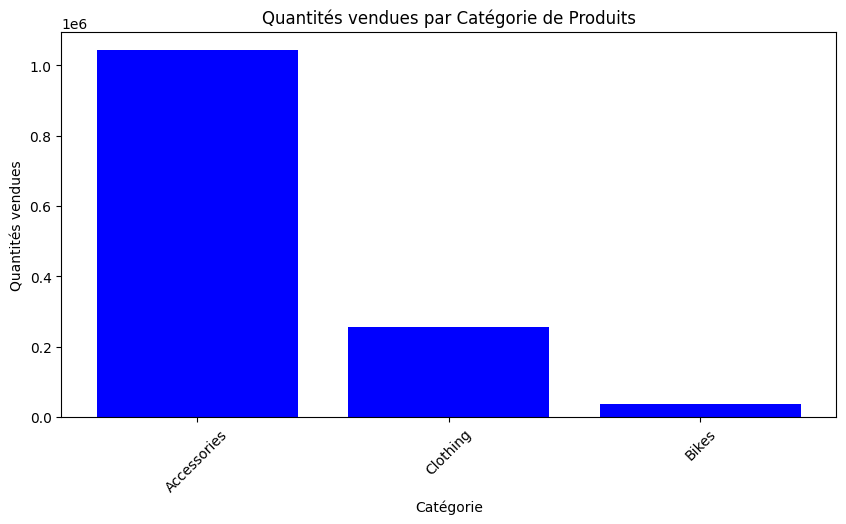

In [ ]:
# Graphique des quantités vendues par catégorie

plt.figure(figsize = (10, 5))
plt.bar(ventes_categorie['Product_Category'], ventes_categorie['Order_Quantity'], color='blue')
plt.xlabel('Catégorie')
plt.ylabel('Quantités vendues')
plt.title('Quantités vendues par Catégorie de Produits')
plt.xticks(rotation = 45)

plt.show()

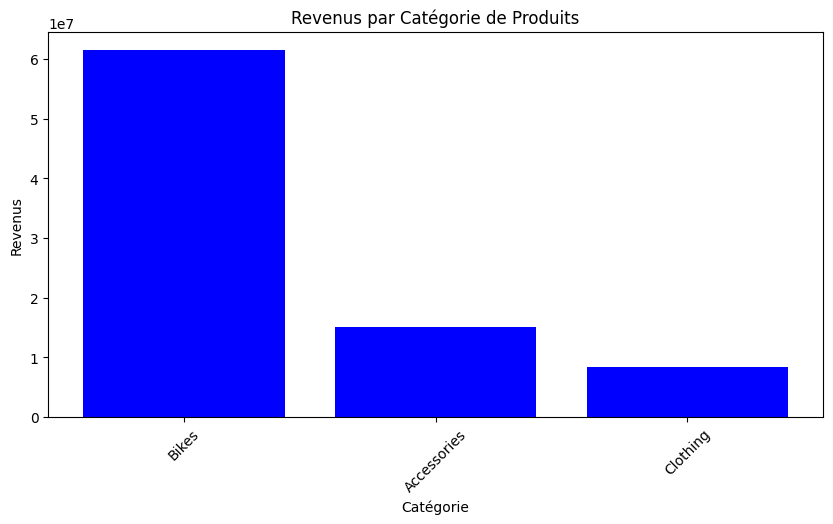

In [ ]:
# Graphique des revenus générés par catégorie

plt.figure(figsize = (10, 5))
plt.bar(revenus_categorie['Product_Category'], revenus_categorie['Revenue'], color='blue')
plt.xlabel('Catégorie')
plt.ylabel('Revenus')
plt.title('Revenus par Catégorie de Produits')
plt.xticks(rotation = 45)

plt.show()

## Analyse des ventes dans le temps

In [ ]:
sales_df['Date'].unique()

<DatetimeArray>
['2013-11-26 00:00:00', '2015-11-26 00:00:00', '2014-03-23 00:00:00',
 '2016-03-23 00:00:00', '2014-05-15 00:00:00', '2016-05-15 00:00:00',
 '2014-05-22 00:00:00', '2016-05-22 00:00:00', '2014-02-22 00:00:00',
 '2016-02-22 00:00:00',
 ...
 '2012-09-06 00:00:00', '2011-09-06 00:00:00', '2012-01-07 00:00:00',
 '2011-01-07 00:00:00', '2012-10-27 00:00:00', '2011-10-27 00:00:00',
 '2013-01-06 00:00:00', '2015-01-06 00:00:00', '2012-02-20 00:00:00',
 '2011-02-20 00:00:00']
Length: 1884, dtype: datetime64[ns]

In [ ]:
sales_df['Date'].value_counts()

Date
2016-03-01    286
2014-03-01    284
2013-12-07    240
2015-12-07    240
2016-06-14    234
             ... 
2011-11-04      1
2012-11-04      1
2011-02-21      1
2012-02-21      1
2011-05-29      1
Name: count, Length: 1884, dtype: int64

In [ ]:
sales_df['Date'].min()

Timestamp('2011-01-01 00:00:00')

In [ ]:
sales_df['Date'].max()

Timestamp('2016-07-31 00:00:00')

Nous avons des données qui vont du 1er janvier 2011 au 31 juillet 2016, soit sur une période de 5 ans et demi.

In [ ]:
# Tendances des revenus mensuels
revenus_mois = sales_df.groupby(sales_df['Date'].dt.to_period("M"))['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_mois

Date  Revenue
54  2015-12  3835500
60  2016-06  3568945
59  2016-05  3249980
35  2013-12  2968056
53  2015-11  2827886
..      ...      ...
61  2016-07   498424
25  2013-02   483909
27  2013-04   472219
26  2013-03   466422
24  2013-01   426890

[62 rows x 2 columns]

Décembre 2015 et Juin 2016 sont les mois qui ont apporté le plus de revenus.

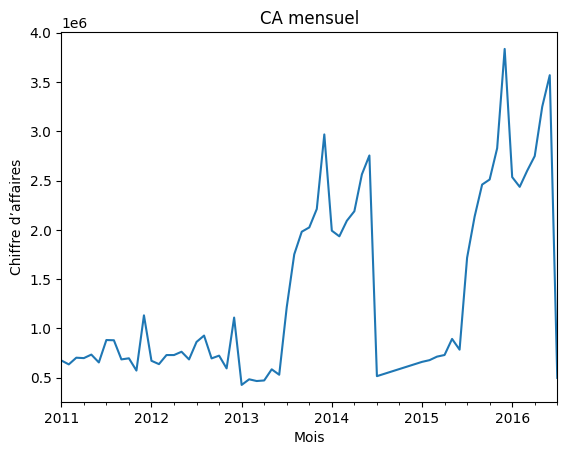

In [ ]:
revenus_mois = sales_df.groupby(sales_df['Date'].dt.to_period("M"))['Revenue'].sum()
revenus_mois.plot(title = "CA mensuel")
plt.ylabel('Chiffre d’affaires')
plt.xlabel('Mois')
plt.show()

In [ ]:
# Tendances des profits mensuels
profit_mois = sales_df.groupby(sales_df['Date'].dt.to_period("M"))['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_mois

Date   Profit
54  2015-12  1474279
60  2016-06  1380697
59  2016-05  1281278
35  2013-12  1187872
41  2014-06  1107368
..      ...      ...
29  2013-06   173782
25  2013-02   159500
26  2013-03   154533
27  2013-04   152606
24  2013-01   140858

[62 rows x 2 columns]

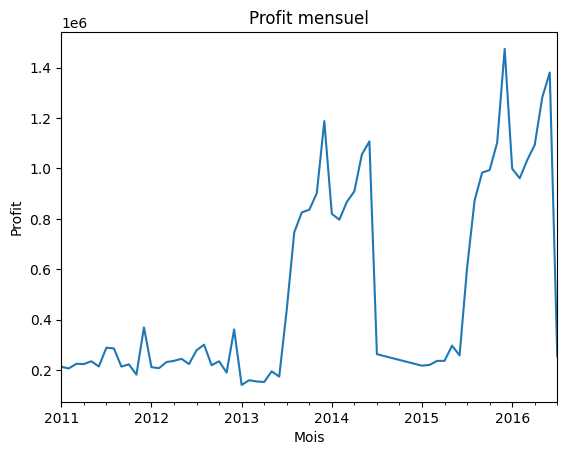

In [ ]:
profit_mois = sales_df.groupby(sales_df['Date'].dt.to_period("M"))['Profit'].sum()
profit_mois.plot(title = "Profit mensuel")
plt.ylabel('Profit')
plt.xlabel('Mois')
plt.show()

Les profits suivent globalement les revenus.

In [ ]:
# Tendances des revenus annuels
revenus_annee = sales_df.groupby(sales_df['Date'].dt.to_period("Y"))['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_annee

Date   Revenue
4  2015  19945703
5  2016  17637789
2  2013  15117327
3  2014  14040192
1  2012   9133795
0  2011   8951966

L'année 2015 affiche le plus de CA.

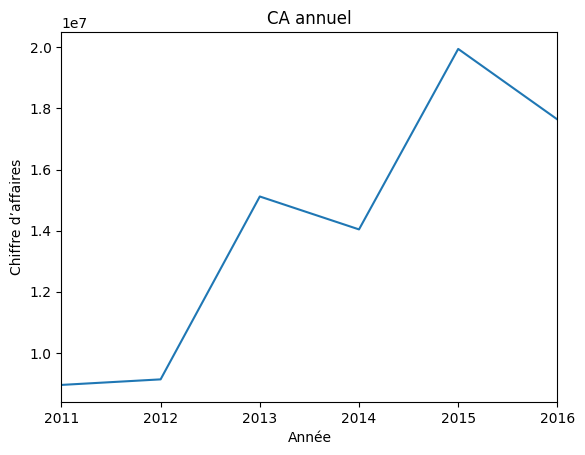

In [ ]:
revenus_annee = sales_df.groupby(sales_df['Date'].dt.to_period("Y"))['Revenue'].sum()
revenus_annee.plot(title = "CA annuel")
plt.ylabel('Chiffre d’affaires')
plt.xlabel('Année')
plt.show()

In [ ]:
# Tendances des profits annuels
profit_annee = sales_df.groupby(sales_df['Date'].dt.to_period("Y"))['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_annee

Date   Profit
4  2015  7497361
5  2016  7002220
2  2013  5912432
3  2014  5818522
1  2012  2938519
0  2011  2877185

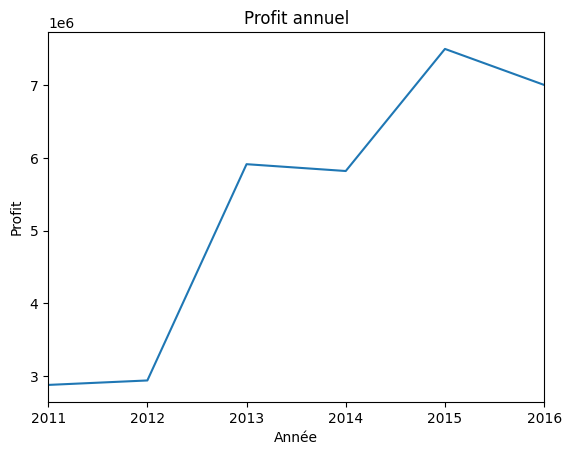

In [ ]:
profit_annee = sales_df.groupby(sales_df['Date'].dt.to_period("Y"))['Profit'].sum()
profit_annee.plot(title = "Profit annuel")
plt.ylabel('Profit')
plt.xlabel('Année')
plt.show()

2015 et 2016 sont les deux années avec le plus de profit.

In [ ]:
# Tendances des quantités vendues par mois
ventes_mois = sales_df.groupby(sales_df['Date'].dt.to_period("M"))['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_mois

Date  Order_Quantity
35  2013-12           65880
54  2015-12           64901
41  2014-06           63605
60  2016-06           62271
40  2014-05           61981
..      ...             ...
29  2013-06             318
27  2013-04             290
26  2013-03             271
25  2013-02             270
24  2013-01             239

[62 rows x 2 columns]

Il semble y avoir beaucoup de commandes en décembre et en juin.

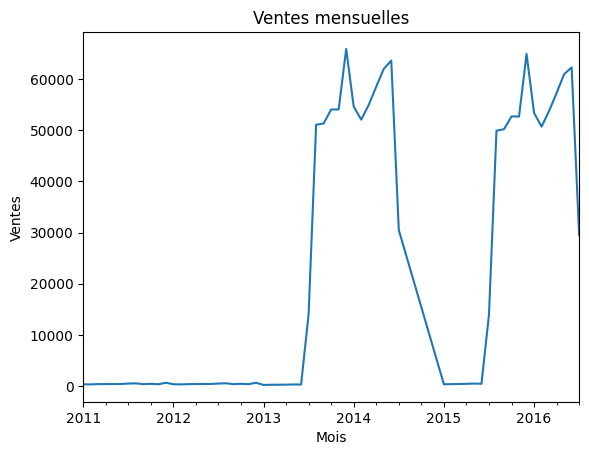

In [ ]:
ventes_mois = sales_df.groupby(sales_df['Date'].dt.to_period("M"))['Order_Quantity'].sum()
ventes_mois.plot(title = "Ventes mensuelles")
plt.ylabel('Ventes')
plt.xlabel('Mois')
plt.show()

In [ ]:
# Tendances des quantités vendues par années
ventes_annee = sales_df.groupby(sales_df['Date'].dt.to_period("Y"))['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_annee

Date  Order_Quantity
3  2014          376231
5  2016          367851
2  2013          292144
4  2015          286897
1  2012            5328
0  2011            5254

Meilleure année : 2014.

Baisse en 2015 (mais bons revenus, voir point précédent).

Remontée en 2016, preque au niveau de 2014 alors que les données s'arrêtent à fin juillet, ce qui laisse présager une belle année.

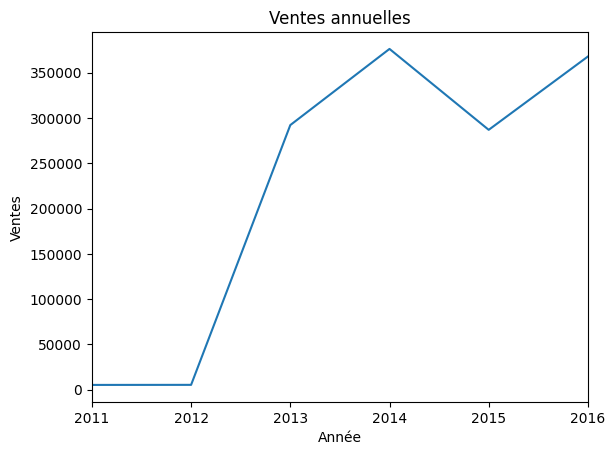

In [ ]:
ventes_annee = sales_df.groupby(sales_df['Date'].dt.to_period("Y"))['Order_Quantity'].sum()
ventes_annee.plot(title = "Ventes annuelles")
plt.ylabel('Ventes')
plt.xlabel('Année')
plt.show()

## Segmentation de la clientèle par tranches d'âge et sexe

In [ ]:
segmentation_client = sales_df.groupby('Age_Group')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
segmentation_client

Age_Group   Revenue
0        Adults (35-64)  42367181
2  Young Adults (25-34)  30467032
3           Youth (<25)  11685489
1         Seniors (64+)    307070

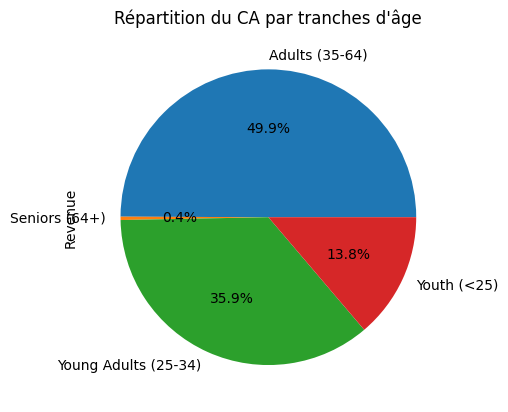

In [ ]:
segmentation_client = sales_df.groupby('Age_Group')['Revenue'].sum()
segmentation_client.plot(kind='pie', title = "Répartition du CA par tranches d'âge", autopct = '%1.1f%%')
plt.show()

In [ ]:
segmentation_client_qty = sales_df.groupby('Age_Group')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
segmentation_client_qty

Age_Group  Order_Quantity
0        Adults (35-64)          667098
2  Young Adults (25-34)          442977
3           Youth (<25)          213923
1         Seniors (64+)            9707

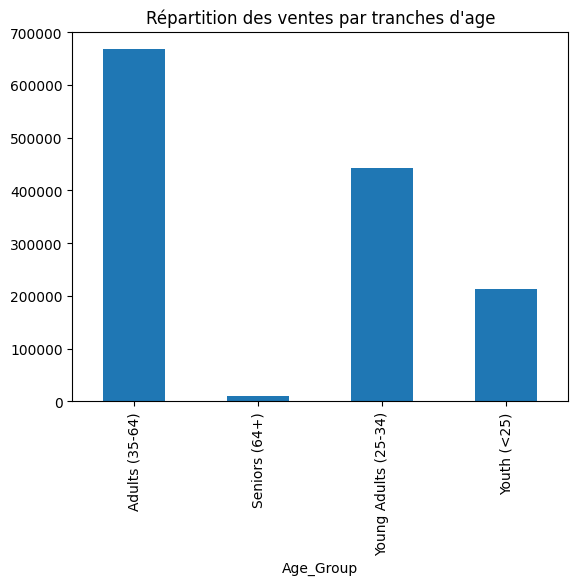

In [ ]:
segmentation_client_qty = sales_df.groupby('Age_Group')['Order_Quantity'].sum()
segmentation_client_qty.plot(kind='bar', title = "Répartition des ventes par tranches d'age")
plt.show()

In [ ]:
segmentation_client_profit = sales_df.groupby('Age_Group')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
segmentation_client_profit

Age_Group    Profit
0        Adults (35-64)  16234940
2  Young Adults (25-34)  11314684
3           Youth (<25)   4359006
1         Seniors (64+)    137609

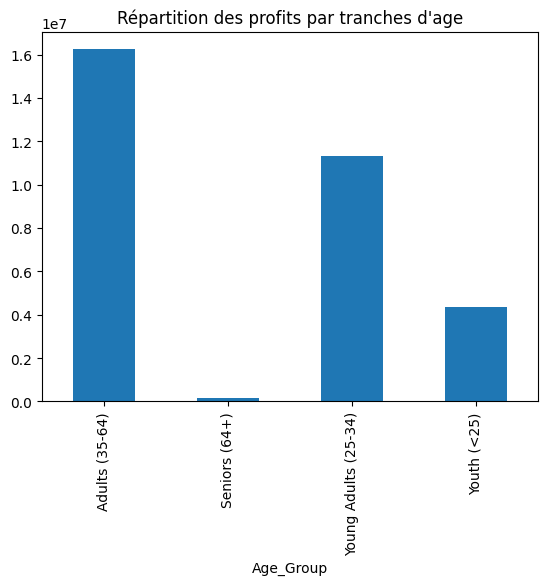

In [ ]:
segmentation_client_profit = sales_df.groupby('Age_Group')['Profit'].sum()
segmentation_client_profit.plot(kind='bar', title = "Répartition des profits par tranches d'age")
plt.show()

La tranche d'âge des adultes (35-64 ans) est la plus représentée.

A noter la très faible représentation des séniors...

In [ ]:
segmentation_genre_r = sales_df.groupby('Customer_Gender')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
segmentation_genre_r

Customer_Gender   Revenue
1               M  43132083
0               F  41694689

In [ ]:
segmentation_genre_qty = sales_df.groupby('Customer_Gender')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
segmentation_genre_qty

Customer_Gender  Order_Quantity
1               M          693747
0               F          639958

In [ ]:
segmentation_genre_p = sales_df.groupby('Customer_Gender')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
segmentation_genre_p

Customer_Gender    Profit
1               M  16404420
0               F  15641819

Pas de très grosse différence ici...

## Distribution des quantités commandées

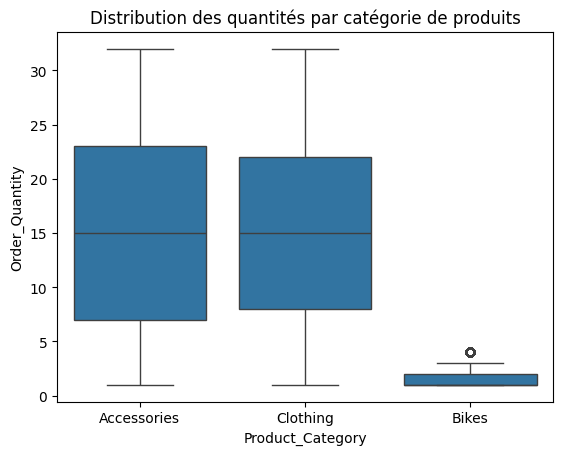

In [ ]:
sns.boxplot(x = 'Product_Category', y = 'Order_Quantity', data = sales_df)
plt.title("Distribution des quantités par catégorie de produits")
plt.show()

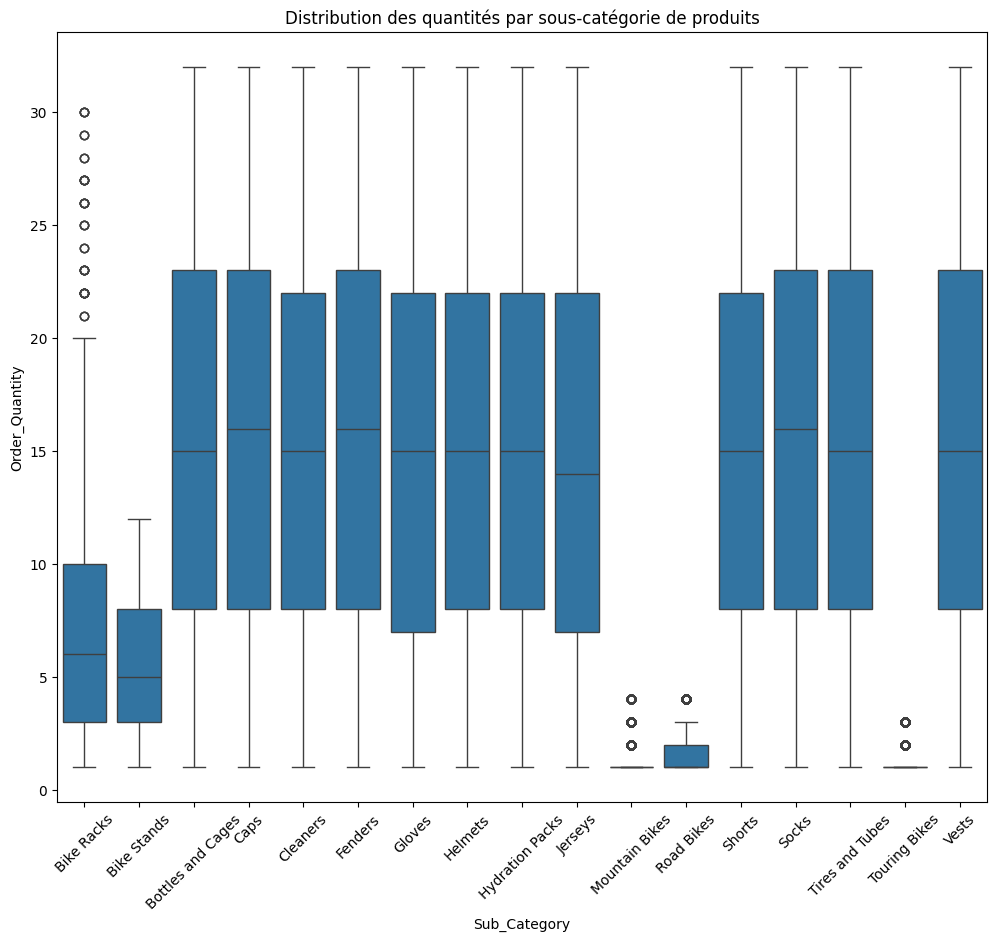

In [ ]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = 'Sub_Category', y = 'Order_Quantity', data = sales_df)
plt.title("Distribution des quantités par sous-catégorie de produits")
plt.xticks(rotation = 45)
plt.show()

Nous l'avons vu : il existe 3 catégories de produits (Accessories, Clothing, Bikes).

- Accessoires : médiane vers 15 avec une distribution assez uniforme des quantités commandées, donc avec une demande qui semble régulière et constante.

- Clothing : médiane similaire à celle des accessoires, mais la distribution semble plus restreinte autour de la médiane, donc moins de variations dans les quantités commandées par rapport aux accessoires.

- Bikes : la majorité des commandes se situent autour de 2 à 5 (logique). Les vélos sont des articles à forte valeur ajoutée, généralement commandés en petites quantités.

In [ ]:
# Résumé statistique du CA par catégorie
sales_df.groupby('Product_Category').agg({'Revenue': ['mean', 'median', 'sum']})

# Il s'agit d'un tableau croisé.

Revenue                  
                         mean  median       sum
Product_Category                               
Accessories        216.741199    98.0  15022766
Bikes             2381.735442  2018.0  61434484
Clothing           494.360425   288.0   8369522

In [ ]:
# Résumé statistique du CA par sous-catégorie
sales_df.groupby('Sub_Category').agg({'Revenue': ['mean', 'median', 'sum']})

Revenue                  
                          mean  median       sum
Sub_Category                                    
Bike Racks          874.662162   706.0    517800
Bike Stands         753.472527   754.0    342830
Bottles and Cages    88.859991    82.0   1390570
Caps                125.924048   127.0    548777
Cleaners            110.333518   110.0    198821
Fenders             308.961558   306.0   1245733
Gloves              324.430007   313.0    871419
Helmets             472.303045   462.0   5738482
Hydration Packs     742.433283   725.5    990406
Jerseys             684.712288   672.0   4112382
Mountain Bikes     2387.912530  2134.0  21020794
Road Bikes         2490.100503  2003.0  33150708
Shorts              970.295429   961.5   1740710
Socks               131.168449   132.0    147171
Tires and Tubes     138.090096    55.0   4598124
Touring Bikes      1974.709625  1955.0   7262982
Vests               984.505187   860.0    949063

In [ ]:
# Résumé statistique du CA par produit
sales_df.groupby('Product').agg({'Revenue': ['mean', 'median', 'sum']})

Revenue                
                                   mean  median     sum
Product                                                
AWC Logo Cap                 126.025700   128.0  549220
All-Purpose Bike Stand       757.026608   763.0  341419
Bike Wash - Dissolver        110.169069   110.0  198745
Classic Vest, L              845.732704   829.5  268943
Classic Vest, M              871.137500   881.0  278764
...                                 ...     ...     ...
Touring-3000 Yellow, 62      786.583333   690.0   56634
Water Bottle - 30 oz.         69.245466    69.0  736841
Women's Mountain Shorts, L   938.331395   928.0  484179
Women's Mountain Shorts, M  1001.744713  1017.0  663155
Women's Mountain Shorts, S   961.753226   965.0  596287

[130 rows x 3 columns]

# Analyse France

## Analyse exploratoire France

In [34]:
# Filtre sur la France
france_df = sales_df[sales_df['Country'] == 'France']
france_df

Date  Customer_Age             Age_Group Customer_Gender Country  \
50     2013-07-15            52        Adults (35-64)               F  France   
51     2015-07-15            52        Adults (35-64)               F  France   
52     2013-08-17            43        Adults (35-64)               F  France   
53     2015-08-17            43        Adults (35-64)               F  France   
60     2013-09-24            32  Young Adults (25-34)               M  France   
...           ...           ...                   ...             ...     ...   
112979 2015-09-08            31  Young Adults (25-34)               M  France   
113000 2014-07-27            34  Young Adults (25-34)               M  France   
113001 2016-07-27            34  Young Adults (25-34)               M  France   
113034 2014-03-04            37        Adults (35-64)               F  France   
113035 2016-03-04            37        Adults (35-64)               F  France   

                    State Product_Category Sub_Category              Product  \
50      Seine Saint Denis      Accessories   Bike Racks  Hitch Rack - 4-Bike   
51      Seine Saint Denis      Accessories   Bike Racks  Hitch Rack - 4-Bike   
52                Moselle      Accessories   Bike Racks  Hitch Rack - 4-Bike   
53                Moselle      Accessories   Bike Racks  Hitch Rack - 4-Bike   
60                   Nord      Accessories   Bike Racks  Hitch Rack - 4-Bike   
...                   ...              ...          ...                  ...   
112979            Essonne         Clothing        Vests      Classic Vest, M   
113000            Essonne         Clothing        Vests      Classic Vest, M   
113001            Essonne         Clothing        Vests      Classic Vest, M   
113034      Seine (Paris)         Clothing        Vests      Classic Vest, L   
113035      Seine (Paris)         Clothing        Vests      Classic Vest, L   

        Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  Revenue  
50                   8         45         120     427   360      787  
51                   8         45         120     427   360      787  
52                  28         45         120    1697  1260     2957  
53                  27         45         120    1636  1215     2851  
60                   6         45         120     356   270      626  
...                ...        ...         ...     ...   ...      ...  
112979              28         24          64    1048   672     1720  
113000               6         24          64     225   144      369  
113001               7         24          64     262   168      430  
113034              24         24          64     684   576     1260  
113035              23         24          64     655   552     1207  

[10920 rows x 15 columns]

In [35]:
# Afficher les départements pour les lignes filtrées françaises
france_df['State'].sort_values().unique()

array(['Charente-Maritime', 'Essonne', 'Garonne (Haute)',
       'Hauts de Seine', 'Loir et Cher', 'Loiret', 'Moselle', 'Nord',
       'Pas de Calais', 'Seine (Paris)', 'Seine Saint Denis',
       'Seine et Marne', 'Somme', "Val d'Oise", 'Val de Marne', 'Yveline'],
      dtype=object)

In [36]:
france_df_dep = france_df[['State']]
france_df_dep

State
50      Seine Saint Denis
51      Seine Saint Denis
52                Moselle
53                Moselle
60                   Nord
...                   ...
112979            Essonne
113000            Essonne
113001            Essonne
113034      Seine (Paris)
113035      Seine (Paris)

[10920 rows x 1 columns]

In [37]:
col_nom = france_df.select_dtypes(include='object').columns

for index, col in enumerate(col_nom):
    print(f'\033[1;3m{col_nom[index]}:\033[0m\n{france_df[col].value_counts()}\n')

Age_Group:
Age_Group
Adults (35-64)          4753
Young Adults (25-34)    4522
Youth (<25)             1576
Seniors (64+)             69
Name: count, dtype: int64

Customer_Gender:
Customer_Gender
F    5463
M    5457
Name: count, dtype: int64

Country:
Country
France    10920
Name: count, dtype: int64

State:
State
Seine (Paris)        2315
Seine Saint Denis    1676
Nord                 1655
Hauts de Seine       1074
Essonne               985
Yveline               943
Seine et Marne        390
Moselle               384
Loiret                380
Val d'Oise            264
Garonne (Haute)       207
Val de Marne          157
Charente-Maritime     147
Somme                 133
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

Product_Category:
Product_Category
Accessories    6615
Bikes          2765
Clothing       1540
Name: count, dtype: int64

Sub_Category:
Sub_Category
Tires and Tubes      3432
Road Bikes           1435
Bottles and Cages    1351
Helmets      

## Analyse descriptive France

### Analyse par catégories et sous-catégories de produits

In [38]:
france_df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [39]:
france_df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [40]:
france_df['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Road Bottle Cage', 'Water Bottle - 30 oz.',
       'Mountain Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, S', 'Half-Finger Gloves, M',
       'Sport-100 Helmet, Blue', 'Sport-100 Helmet, Black',
       'Sport-100 Helmet, Red', 'Hydration Pack - 70 oz.',
       'Long-Sleeve Logo Jersey, M', 'Short-Sleeve Classic Jersey, L',
       'Long-Sleeve Logo Jersey, L', 'Short-Sleeve Classic Jersey, S',
       'Short-Sleeve Classic Jersey, M', 'Long-Sleeve Logo Jersey, XL',
       'Short-Sleeve Classic Jersey, XL', 'Long-Sleeve Logo Jersey, S',
       'Mountain-500 Silver, 40', 'Mountain-200 Silver, 46',
       'Mountain-200 Black, 38', 'Mountain-200 Black, 42',
       'Mountain-400-W Silver, 46', 'Mountain-200 Silver, 42',
       'Mountain-200 Silver, 38', 'Mountain-200 Black, 46',
       'Mountain-500 Silver, 44', 'Mountain-400-W Silver, 

In [41]:
# Quantités totales vendues par catégorie
ventes_categorie = france_df.groupby('Product_Category')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_categorie

Product_Category  Order_Quantity
0      Accessories          100315
2         Clothing           23750
1            Bikes            3807

In [42]:
# Profit par catégorie
profit_categorie = france_df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_categorie

Product_Category   Profit
1            Bikes  1908627
0      Accessories   773136
2         Clothing   190319

Les accessoires sont très vendus mais là aussi ce sont les vélos qui font le plus de profit.

In [43]:
# Revenus générés par catégorie
revenus_categorie = france_df.groupby('Product_Category')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_categorie

Product_Category  Revenue
1            Bikes  6316991
0      Accessories  1377060
2         Clothing   720694

Ce sont les vélos qui apportent largement le plus de revenus, ils sont plus chers que les accessoires et vêtements. Vendre des vélos permet de vendre également des accessoires et vêtements spécialisés dans le vélo. C'est le produit d'appel...

In [44]:
# Quantités totales vendues par sous-catégorie
ventes_sous_categorie = france_df.groupby('Sub_Category')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_sous_categorie

Sub_Category  Order_Quantity
14    Tires and Tubes           52313
2   Bottles and Cages           20942
7             Helmets           20112
9             Jerseys            9343
3                Caps            7190
5             Fenders            3320
6              Gloves            3154
11         Road Bikes            2045
12             Shorts            1651
4            Cleaners            1542
8     Hydration Packs            1468
16              Vests            1467
10     Mountain Bikes            1226
13              Socks             945
15      Touring Bikes             536
0          Bike Racks             408
1         Bike Stands             210

Les pneus et chambres à air ainsi que les bouteilles et cages sont les sous-catégories avec le plus de commandes.

In [45]:
# Revenus générés par sous-catégorie
revenus_sous_categorie = france_df.groupby('Sub_Category')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_sous_categorie

Sub_Category  Revenue
11         Road Bikes  3457247
10     Mountain Bikes  2080204
15      Touring Bikes   779540
7             Helmets   601948
14    Tires and Tubes   448298
9             Jerseys   412346
2   Bottles and Cages   114353
12             Shorts    99447
16              Vests    81435
8     Hydration Packs    69772
6              Gloves    64609
5             Fenders    61806
3                Caps    55610
0          Bike Racks    41775
1         Bike Stands    28359
4            Cleaners    10749
13              Socks     7247

In [46]:
# Profit par sous-catégorie
profit_sous_categorie = france_df.groupby('Sub_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_sous_categorie

Sub_Category  Profit
11         Road Bikes  947040
10     Mountain Bikes  747828
7             Helmets  340492
14    Tires and Tubes  249573
15      Touring Bikes  213759
2   Bottles and Cages   63374
12             Shorts   56521
16              Vests   46227
9             Jerseys   41656
8     Hydration Packs   38944
6              Gloves   36223
5             Fenders   35246
0          Bike Racks   23415
1         Bike Stands   15969
4            Cleaners    6123
3                Caps    5280
13              Socks    4412

Les vélos de route et de montagne apportent le plus de revenus et de profit.

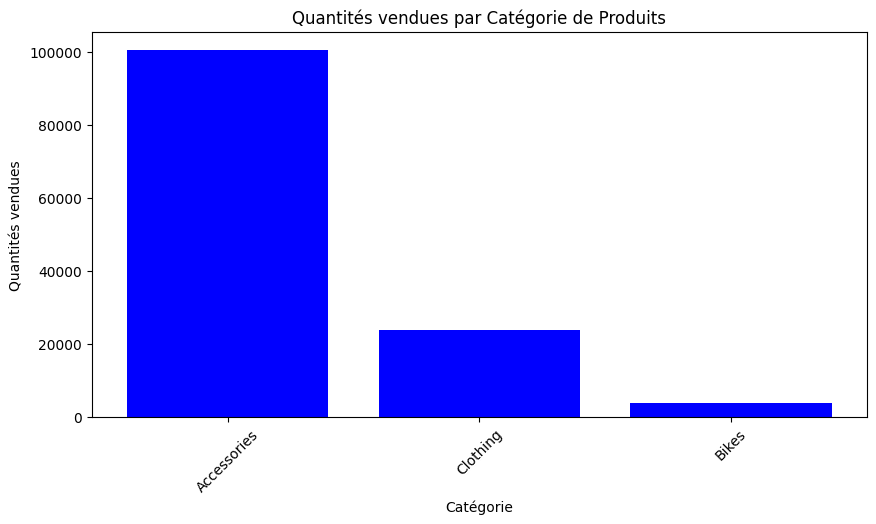

In [47]:
# Graphique des quantités vendues par catégorie

plt.figure(figsize = (10, 5))
plt.bar(ventes_categorie['Product_Category'], ventes_categorie['Order_Quantity'], color='blue')
plt.xlabel('Catégorie')
plt.ylabel('Quantités vendues')
plt.title('Quantités vendues par Catégorie de Produits')
plt.xticks(rotation = 45)

plt.show()

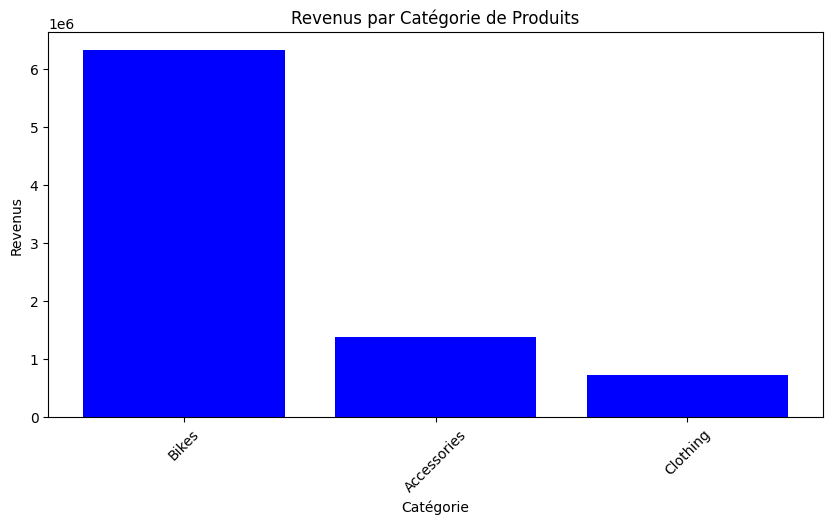

In [48]:
# Graphique des revenus générés par catégorie

plt.figure(figsize = (10, 5))
plt.bar(revenus_categorie['Product_Category'], revenus_categorie['Revenue'], color='blue')
plt.xlabel('Catégorie')
plt.ylabel('Revenus')
plt.title('Revenus par Catégorie de Produits')
plt.xticks(rotation = 45)

plt.show()

### Analyse des ventes dans le temps

In [49]:
france_df['Date'].unique()

<DatetimeArray>
['2013-07-15 00:00:00', '2015-07-15 00:00:00', '2013-08-17 00:00:00',
 '2015-08-17 00:00:00', '2013-09-24 00:00:00', '2015-09-24 00:00:00',
 '2014-07-28 00:00:00', '2016-07-28 00:00:00', '2014-06-06 00:00:00',
 '2016-06-06 00:00:00',
 ...
 '2014-06-13 00:00:00', '2016-06-13 00:00:00', '2013-09-03 00:00:00',
 '2015-09-03 00:00:00', '2014-07-23 00:00:00', '2016-07-23 00:00:00',
 '2014-07-15 00:00:00', '2016-07-15 00:00:00', '2013-10-31 00:00:00',
 '2015-10-31 00:00:00']
Length: 1332, dtype: datetime64[ns]

In [50]:
france_df['Date'].value_counts()

Date
2013-12-07    43
2015-12-07    43
2014-04-19    37
2016-04-19    37
2013-12-04    34
              ..
2015-03-23     1
2011-12-31     1
2012-12-31     1
2011-11-24     1
2015-10-31     1
Name: count, Length: 1332, dtype: int64

In [51]:
france_df['Date'].min()

Timestamp('2011-01-01 00:00:00')

In [52]:
france_df['Date'].max()

Timestamp('2016-07-29 00:00:00')

Nous avons des données qui vont du 1er janvier 2011 au 29 juillet 2016, soit sur une période de 5 ans et demi.

In [53]:
# Tendances des revenus mensuels
revenus_mois = france_df.groupby(sales_df['Date'].dt.to_period("M"))['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_mois

Date  Revenue
54  2015-12   391320
59  2016-05   333204
60  2016-06   323100
35  2013-12   305691
58  2016-04   302017
..      ...      ...
22  2012-11    45120
24  2013-01    42951
3   2011-04    39840
42  2014-07    39101
61  2016-07    37118

[62 rows x 2 columns]

Décembre 2015 et Mai 2016 sont les mois qui ont apporté le plus de revenus.

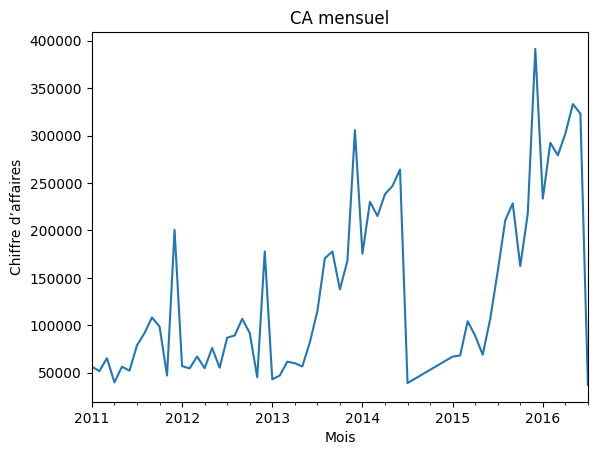

In [54]:
revenus_mois = france_df.groupby(sales_df['Date'].dt.to_period("M"))['Revenue'].sum()
revenus_mois.plot(title = "CA mensuel")
plt.ylabel('Chiffre d’affaires')
plt.xlabel('Mois')
plt.show()

In [55]:
# Tendances des profits mensuels
profit_mois = france_df.groupby(sales_df['Date'].dt.to_period("M"))['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_mois

Date  Profit
54  2015-12  143335
35  2013-12  117476
59  2016-05  114828
60  2016-06  113724
58  2016-04  105241
..      ...     ...
24  2013-01   13582
25  2013-02   13390
10  2011-11   12496
3   2011-04   12178
22  2012-11   12118

[62 rows x 2 columns]

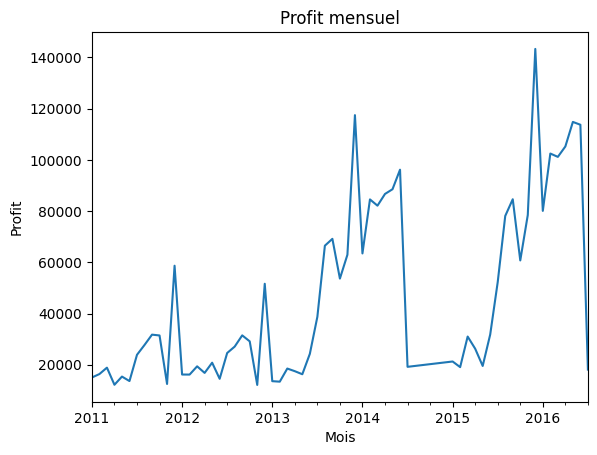

In [56]:
profit_mois = france_df.groupby(sales_df['Date'].dt.to_period("M"))['Profit'].sum()
profit_mois.plot(title = "Profit mensuel")
plt.ylabel('Profit')
plt.xlabel('Mois')
plt.show()

Les profits suivent globalement les revenus.

In [57]:
# Tendances des revenus annuels
revenus_annee = france_df.groupby(sales_df['Date'].dt.to_period("Y"))['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_annee

Date  Revenue
4  2015  1871282
5  2016  1800511
2  2013  1425103
3  2014  1409072
1  2012   962153
0  2011   946624

L'année 2015 affiche le plus de CA. 2016 est bien partie pour passer à la 1ère place, l'entreprise est en croissance.

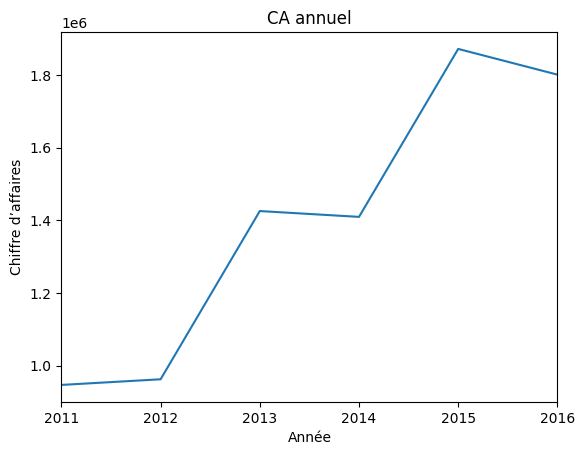

In [58]:
revenus_annee = france_df.groupby(sales_df['Date'].dt.to_period("Y"))['Revenue'].sum()
revenus_annee.plot(title = "CA annuel")
plt.ylabel('Chiffre d’affaires')
plt.xlabel('Année')
plt.show()

In [59]:
# Tendances des profits annuels
profit_annee = france_df.groupby(sales_df['Date'].dt.to_period("Y"))['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
profit_annee

Date  Profit
4  2015  646498
5  2016  635646
3  2014  520758
2  2013  511956
1  2012  279851
0  2011  277373

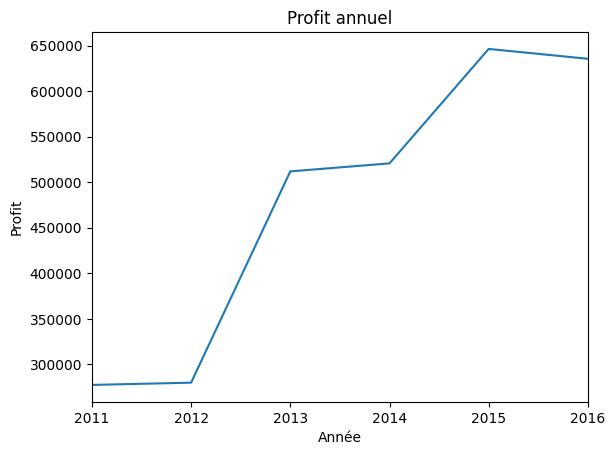

In [60]:
profit_annee = france_df.groupby(sales_df['Date'].dt.to_period("Y"))['Profit'].sum()
profit_annee.plot(title = "Profit annuel")
plt.ylabel('Profit')
plt.xlabel('Année')
plt.show()

2015 et 2016 sont les deux années avec le plus de profit.

In [61]:
# Tendances des quantités vendues par mois
ventes_mois = france_df.groupby(sales_df['Date'].dt.to_period("M"))['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_mois

Date  Order_Quantity
35  2013-12            6792
54  2015-12            6686
39  2014-04            6196
41  2014-06            6175
58  2016-04            5982
..      ...             ...
24  2013-01              22
12  2012-01              22
13  2012-02              22
0   2011-01              22
1   2011-02              19

[62 rows x 2 columns]

Il semble y avoir beaucoup de commandes en décembre, en juin et en avril.

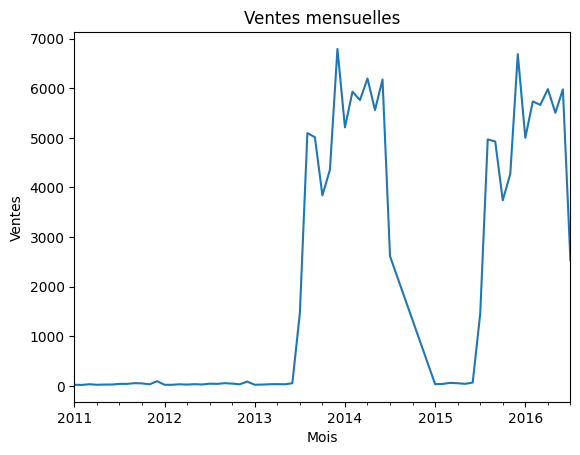

In [62]:
ventes_mois = france_df.groupby(sales_df['Date'].dt.to_period("M"))['Order_Quantity'].sum()
ventes_mois.plot(title = "Ventes mensuelles")
plt.ylabel('Ventes')
plt.xlabel('Mois')
plt.show()

In [63]:
# Tendances des quantités vendues par années
ventes_annee = france_df.groupby(sales_df['Date'].dt.to_period("Y"))['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_annee

Date  Order_Quantity
3  2014           37444
5  2016           36399
2  2013           26760
4  2015           26345
1  2012             466
0  2011             458

Meilleure année : 2014.

2015 au niveau de 2013.

Remontée en 2016, preque au niveau de 2014 alors que les données s'arrêtent à fin juillet, ce qui laisse présager une belle année.

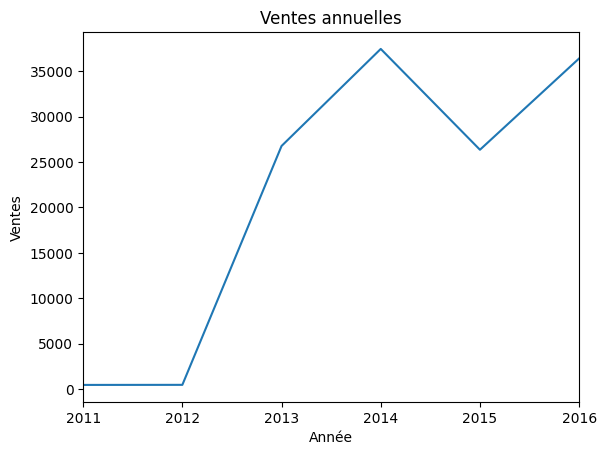

In [64]:
ventes_annee = france_df.groupby(sales_df['Date'].dt.to_period("Y"))['Order_Quantity'].sum()
ventes_annee.plot(title = "Ventes annuelles")
plt.ylabel('Ventes')
plt.xlabel('Année')
plt.show()

### Segmentation de la clientèle par tranches d'âge et sexe

In [65]:
segmentation_client = france_df.groupby('Age_Group')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
segmentation_client

Age_Group  Revenue
2  Young Adults (25-34)  3806335
0        Adults (35-64)  3613545
3           Youth (<25)   980929
1         Seniors (64+)    13936

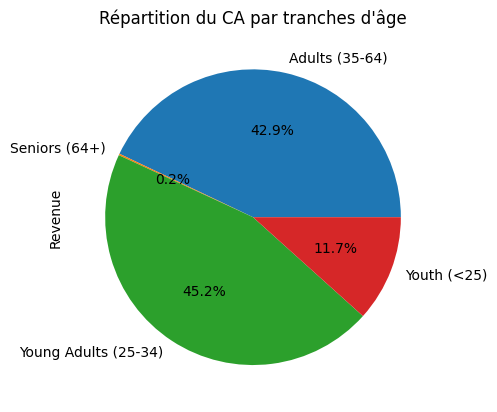

In [66]:
segmentation_client = france_df.groupby('Age_Group')['Revenue'].sum()
segmentation_client.plot(kind='pie', title = "Répartition du CA par tranches d'âge", autopct = '%1.1f%%')
plt.show()

In [67]:
segmentation_client_qty = france_df.groupby('Age_Group')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
segmentation_client_qty

Age_Group  Order_Quantity
0        Adults (35-64)           56782
2  Young Adults (25-34)           49975
3           Youth (<25)           20106
1         Seniors (64+)            1009

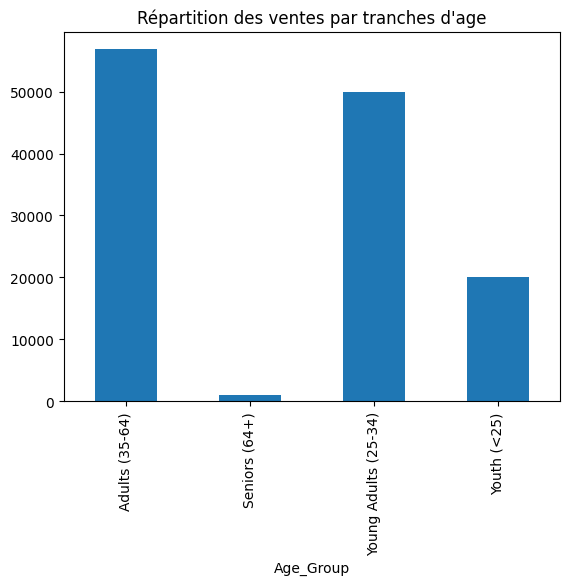

In [68]:
segmentation_client_qty = france_df.groupby('Age_Group')['Order_Quantity'].sum()
segmentation_client_qty.plot(kind='bar', title = "Répartition des ventes par tranches d'age")
plt.show()

In [69]:
segmentation_client_profit = france_df.groupby('Age_Group')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
segmentation_client_profit

Age_Group   Profit
0        Adults (35-64)  1272957
2  Young Adults (25-34)  1242419
3           Youth (<25)   351131
1         Seniors (64+)     5575

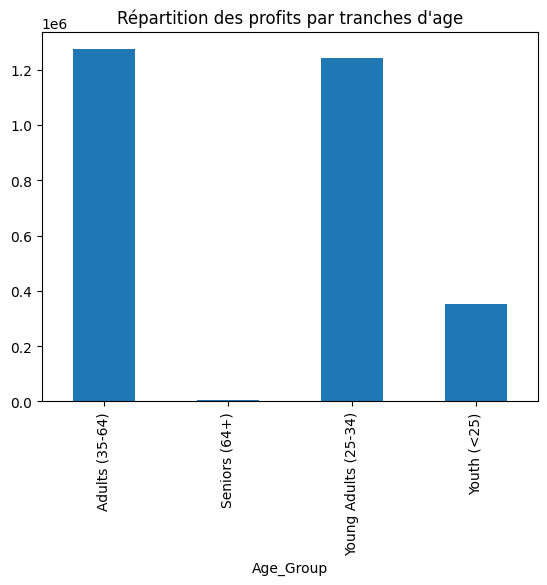

In [70]:
segmentation_client_profit = france_df.groupby('Age_Group')['Profit'].sum()
segmentation_client_profit.plot(kind='bar', title = "Répartition des profits par tranches d'age")
plt.show()

La tranche d'âge des adultes (35-64 ans) est la plus représentée.

A noter la très faible représentation des séniors...

In [71]:
segmentation_genre_r = france_df.groupby('Customer_Gender')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
segmentation_genre_r

Customer_Gender  Revenue
1               M  4410670
0               F  4004075

In [72]:
segmentation_genre_qty = france_df.groupby('Customer_Gender')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
segmentation_genre_qty

Customer_Gender  Order_Quantity
0               F           64712
1               M           63160

In [73]:
segmentation_genre_p = france_df.groupby('Customer_Gender')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
segmentation_genre_p

Customer_Gender   Profit
1               M  1487510
0               F  1384572

Pas de très grosse différence ici...

### Distribution des quantités commandées

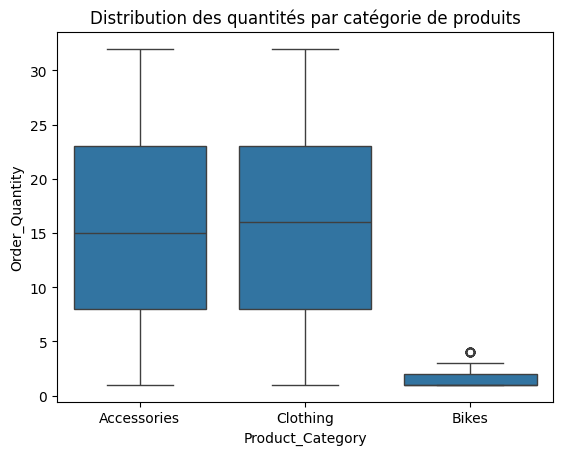

In [74]:
sns.boxplot(x = 'Product_Category', y = 'Order_Quantity', data = france_df)
plt.title("Distribution des quantités par catégorie de produits")
plt.show()

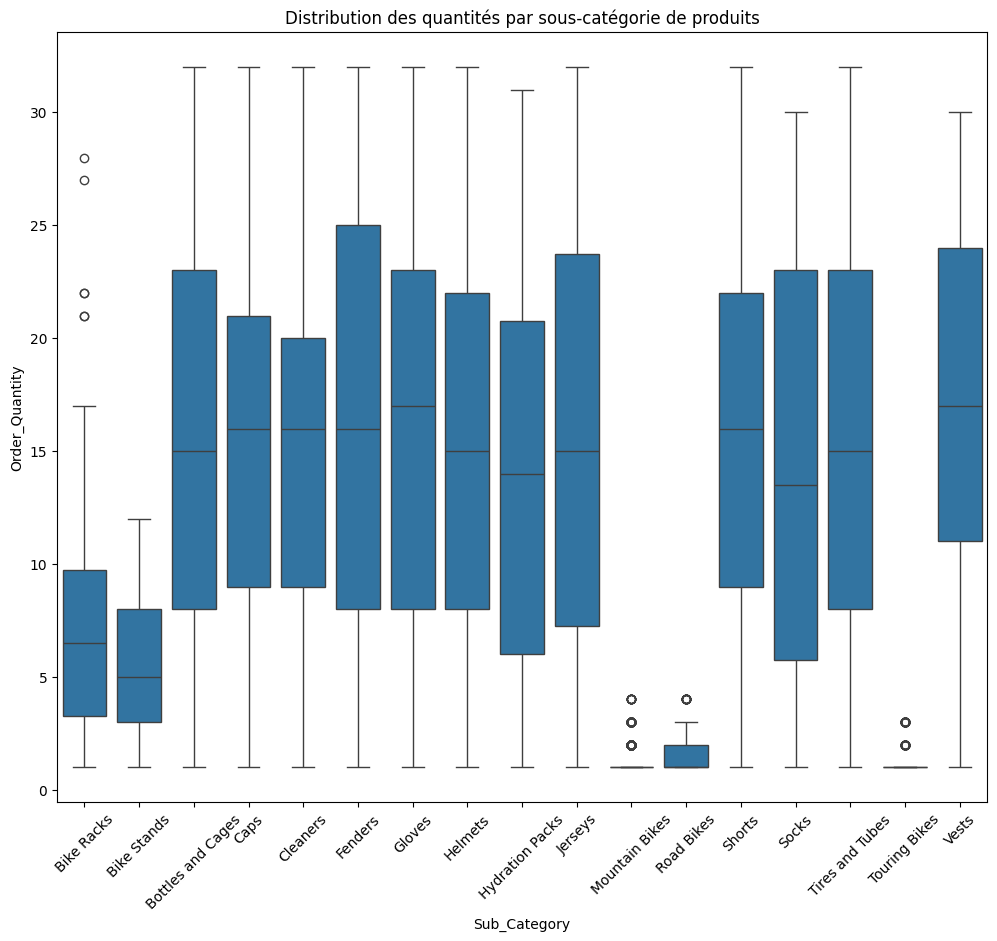

In [75]:
plt.figure(figsize = (12, 10))
sns.boxplot(x = 'Sub_Category', y = 'Order_Quantity', data = france_df)
plt.title("Distribution des quantités par sous-catégorie de produits")
plt.xticks(rotation = 45)
plt.show()

Nous l'avons vu : il existe 3 catégories de produits (Accessories, Clothing, Bikes).

- Accessoires : médiane vers 15 avec une distribution assez uniforme des quantités commandées, donc avec une demande qui semble régulière et constante.

- Clothing : médiane similaire à celle des accessoires, mais la distribution semble plus restreinte autour de la médiane, donc moins de variations dans les quantités commandées par rapport aux accessoires.

- Bikes : la majorité des commandes se situent autour de 2 à 5 (logique). Les vélos sont des articles à forte valeur ajoutée, généralement commandés en petites quantités.

In [76]:
# Résumé statistique du CA par catégorie
france_df.groupby('Product_Category').agg({'Revenue': ['mean', 'median', 'sum']})

# Il s'agit d'un tableau croisé.

Revenue                 
                         mean  median      sum
Product_Category                              
Accessories        208.172336    93.0  1377060
Bikes             2284.626040  1955.0  6316991
Clothing           467.983117   283.0   720694

In [77]:
# Résumé statistique du CA par sous-catégorie
france_df.groupby('Sub_Category').agg({'Revenue': ['mean', 'median', 'sum']})

Revenue                 
                          mean  median      sum
Sub_Category                                   
Bike Racks          835.500000   632.0    41775
Bike Stands         746.289474   735.5    28359
Bottles and Cages    84.643227    79.0   114353
Caps                117.320675   121.0    55610
Cleaners            103.355769   105.0    10749
Fenders             302.970588   289.0    61806
Gloves              319.846535   344.5    64609
Helmets             452.592481   442.0   601948
Hydration Packs     658.226415   632.5    69772
Jerseys             675.977049   664.0   412346
Mountain Bikes     2275.934354  1902.0  2080204
Road Bikes         2409.231359  2003.0  3457247
Shorts              938.179245  1008.0    99447
Socks               113.234375   103.0     7247
Tires and Tubes     130.622960    50.0   448298
Touring Bikes      1873.894231  1937.0   779540
Vests               969.464286   947.0    81435

In [78]:
# Résumé statistique du CA par produit
france_df.groupby('Product').agg({'Revenue': ['mean', 'median', 'sum']})

Revenue               
                                   mean  median    sum
Product                                               
AWC Logo Cap                 117.320675   121.0  55610
All-Purpose Bike Stand       746.289474   735.5  28359
Bike Wash - Dissolver        103.355769   105.0  10749
Classic Vest, L              928.000000   892.0  35264
Classic Vest, M             1116.363636  1152.0  24560
...                                 ...     ...    ...
Touring-3000 Yellow, 62      769.625000   608.0   6157
Water Bottle - 30 oz.         66.821008    65.0  62344
Women's Mountain Shorts, L   862.676471   929.5  29331
Women's Mountain Shorts, M  1104.447368  1022.0  41969
Women's Mountain Shorts, S   827.852941  1020.5  28147

[129 rows x 3 columns]

# Analyse stratégique

## Localisation géographique

In [79]:
sales_df['Country'].nunique()

6

In [80]:
sales_df['State'].nunique()

53

In [81]:
# Revenus par pays
revenus_pays = sales_df.groupby('Country')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_pays

Country   Revenue
5   United States  27777098
0       Australia  21196395
4  United Kingdom  10575628
3         Germany   8956724
2          France   8414745
1          Canada   7906182

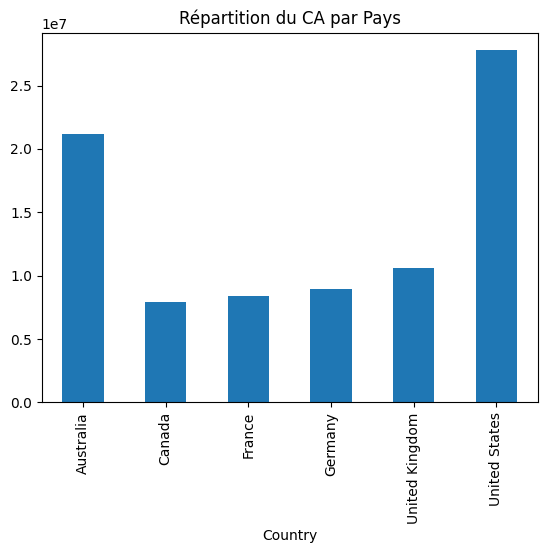

In [82]:
segmentation_client_pays = sales_df.groupby('Country')['Revenue'].sum()
segmentation_client_pays.plot(kind = 'bar', title = "Répartition du CA par Pays")
plt.show()

In [83]:
# Quantités totales vendues par pays
ventes_pays = sales_df.groupby('Country')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
ventes_pays

Country  Order_Quantity
5   United States          473880
0       Australia          261227
1          Canada          190202
4  United Kingdom          155769
2          France          127872
3         Germany          124755

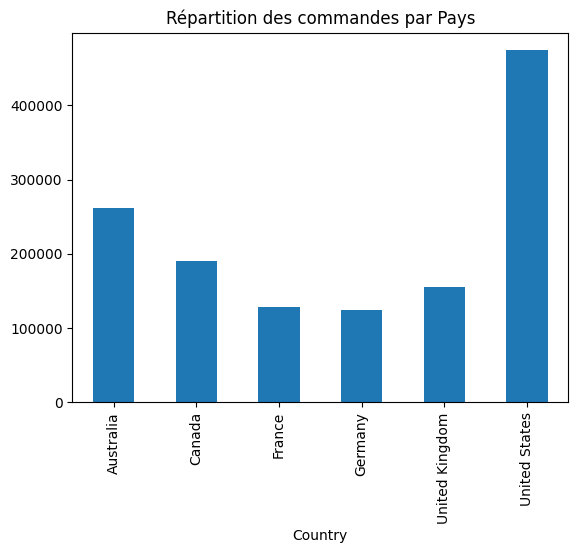

In [84]:
segmentation_client_pays_qty = sales_df.groupby('Country')['Order_Quantity'].sum()
segmentation_client_pays_qty.plot(kind = 'bar', title = "Répartition des commandes par Pays")
plt.show()

Dans les deux cas, les Etats-Unis arrivent largement en tête.

In [85]:
# Revenus par Etat
revenus_etat = sales_df.groupby('State')['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
revenus_etat

State   Revenue
6            California  17529787
8               England  10575628
26      New South Wales   9125980
5      British Columbia   7848334
50           Washington   6701258
35           Queensland   5055843
48             Victoria   5038294
33               Oregon   3435046
15               Hessen   2067980
36             Saarland   2026497
29  Nordrhein-Westfalen   1803855
37        Seine (Paris)   1642370
13              Hamburg   1550469
41      South Australia   1396139
3                Bayern   1338181
28                 Nord   1319127
38    Seine Saint Denis   1126738
9               Essonne    972701
14       Hauts de Seine    935836
52              Yveline    688924
43             Tasmania    580139
39       Seine et Marne    372243
19               Loiret    325081
25              Moselle    266124
11      Garonne (Haute)    183412
4           Brandenburg    169742
46           Val d'Oise    148295
7     Charente-Maritime    106000
40                Somme    101846
47         Val de Marne     93102
18         Loir et Cher     82533
1               Alberta     56803
34        Pas de Calais     50413
51              Wyoming     21973
16             Illinois     20141
10              Florida     11014
31                 Ohio      9747
2               Arizona      9379
44                Texas      6835
27             New York      5257
12              Georgia      4862
20        Massachusetts      4084
45                 Utah      4037
17             Kentucky      3756
24              Montana      2005
23             Missouri      1739
22          Mississippi      1684
21            Minnesota      1466
42       South Carolina      1241
49             Virginia      1172
32              Ontario      1045
30       North Carolina       405
0               Alabama       210

In [86]:
# Quantités commandées par Etat
commandes_etat = sales_df.groupby('State')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
commandes_etat

State  Order_Quantity
6            California          267614
5      British Columbia          189499
8               England          155769
50           Washington          136894
26      New South Wales          114898
33               Oregon           66551
48             Victoria           65668
35           Queensland           57014
36             Saarland           30856
29  Nordrhein-Westfalen           29744
37        Seine (Paris)           27213
15               Hessen           26244
13              Hamburg           20154
38    Seine Saint Denis           19982
28                 Nord           18973
41      South Australia           15619
3                Bayern           15484
14       Hauts de Seine           12596
9               Essonne           11746
52              Yveline           10766
43             Tasmania            8028
39       Seine et Marne            4405
19               Loiret            4284
25              Moselle            4162
46           Val d'Oise            3307
11      Garonne (Haute)            2394
4           Brandenburg            2273
47         Val de Marne            2097
40                Somme            1643
7     Charente-Maritime            1619
18         Loir et Cher            1477
34        Pas de Calais            1208
1               Alberta             587
31                 Ohio             572
44                Texas             330
16             Illinois             299
27             New York             276
21            Minnesota             131
17             Kentucky             130
45                 Utah             126
10              Florida             125
24              Montana             122
42       South Carolina             117
32              Ontario             116
12              Georgia             112
0               Alabama             105
22          Mississippi              91
51              Wyoming              84
23             Missouri              66
30       North Carolina              63
49             Virginia              63
2               Arizona               7
20        Massachusetts               2

Dans les deux cas, la Californie est en tête. A noter que le premier département français est le Nord.

## Produits tendances

In [87]:
tendances_produits = sales_df.groupby(['Product'])['Revenue'].sum().reset_index().sort_values(by = 'Revenue', ascending = False)
tendances_produits

Product  Revenue
61          Road-150 Red, 62  3810023
32    Mountain-200 Black, 38  3345501
59          Road-150 Red, 52  3152610
60          Road-150 Red, 56  3142811
36   Mountain-200 Silver, 42  3070174
..                       ...      ...
49   Mountain-500 Silver, 44    49638
117    Touring-3000 Blue, 50    45694
87          Road-650 Red, 52    34669
50   Mountain-500 Silver, 48    25794
46    Mountain-500 Black, 52    19287

[130 rows x 2 columns]

In [88]:
tendances_produits_qty = sales_df.groupby(['Product'])['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending = False)
tendances_produits_qty

Product  Order_Quantity
126    Water Bottle - 30 oz.          162051
52       Patch Kit/8 Patches          155310
23        Mountain Tire Tube          100915
0               AWC Logo Cap           67316
101    Sport-100 Helmet, Red           63652
..                       ...             ...
25    Mountain-100 Black, 42              72
117    Touring-3000 Blue, 50              70
50   Mountain-500 Silver, 48              52
87          Road-650 Red, 52              52
46    Mountain-500 Black, 52              40

[130 rows x 2 columns]

In [89]:
tendances_produits_profit = sales_df.groupby(['Product'])['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending = False)
tendances_produits_profit

Product   Profit
32    Mountain-200 Black, 38  1302237
61          Road-150 Red, 62  1237388
36   Mountain-200 Silver, 42  1226878
101    Sport-100 Helmet, Red  1191175
35   Mountain-200 Silver, 38  1155311
..                       ...      ...
125  Touring-3000 Yellow, 62    18371
117    Touring-3000 Blue, 50    13424
50   Mountain-500 Silver, 48     9778
87          Road-650 Red, 52     9345
46    Mountain-500 Black, 52     7487

[130 rows x 2 columns]

Comme vu précédemment, les produits de route et de montagne se vendent bien et rapportent le plus.

# Choix stratégique

Résumé global :

Vue d'ensemble de l'ensemble du réseau de la chaîne de vente au détail pour la période 2011-2016 :

- La plupart des ventes sont réalisées en juin et en décembre.

- Années avec le plus de ventes : 2016 (au 31 juillet) - et 2014.

- Le groupe d'âge le plus important parmi les clients est celui des adultes (35-64), tandis que la proportion de personnes âgées (>64) est réduit.

- Les hommes achètent un peu plus que les femmes (4 %), mais ce n'est pas grand chose.

- Pays avec le plus de ventes : Etats-Unis

- État ayant réalisé le plus de ventes : Californie

- Principale catégorie de produits : Accessoires

- Principale sous-catégorie : Pneus et chambres à air

- Catégorie de vélo la plus populaire : Vélos de route et de montagne

- Article le plus vendu : Bouteilles


Le résumé français résume ces constatations, avec des chiffes moins élevés que les Etats-Unis.


Choix effectué :

- Nom : Bike & Roll, en référence au Rock n roll, qui a pour but d'attirer une population adulte (25-64 ans), urbaine, plutôt jeune et dynamique. Les deux sexes sont concernés car la parité est présente.
- Ce sera un magasin généraliste, implanté dans un premier temps dans la région parisienne, en France.
- Si tout se passe bien, des magasins pourront ouvrir dans le Nord, qui se situe à proximité et qui rapporte également en CA et profit.
- Les ventes seront très centrées sur les vélos de route (il y a de plus en plus de pistes cyclables à Paris et la circulation fait partie des préoccupations à l'haure ou les routes et transports en commun sont saturés), et de montagne (les Parisiens passent souvent leurs vacances à la montagne en été et en hiver et les meilleurs ventes se font à cette période). Il s'agit du produit d'appel.
- Il proposera également de nombreux accessoires en complément, notamment les pneus, les tubes, les casques, et les vêtements. Ce sont les plus populaires chez les cyclistes et rentables.
- Au niveau des prix, les prix les plus élevés seront ceux des vélos. Les accessoires constitueront un complément de vente et permettra de fidéliser la clientèle, avec des promotions par exemple.
- Justement, il y aura également un aspect marketing, basé entre autres sur des campagnes de promotions et des réductions ciblées, par exemple, sur les vélos de route en été et de montagne en hiver. Des événements anniversaire et participation aux événeemnts locaux pourraient également avoir lieu.

 # Exporter des données france_df dans un fichier .csv

In [ ]:
# Sauvegarder le DataFrame dans un fichier CSV
france_df.to_csv('france_df.csv', index=False)